In [324]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Bring in DataFrames

In [325]:
df=pd.read_pickle('./all_colors_and_shows.pkl')
display(df.shape)

(277215, 15)

In [326]:
df=df.reset_index().rename({'index':'color_index'},axis=1)

In [327]:
df.tail(5)

,color_index,decimal_r,distance,hex,image_pixel_ratio,colors,designer,original_r,frequency,image_path,season,decimal_g,look,decimal_b,original_g,original_b
277210,15,47,45.803930,#6b8ba4,0.006872,grey blue,Versace,74,67,./Canny_Filtered_Images/Versace_Fall 2015 Read...,Fall 2015 Ready-to-Wear,75,Look 49,104,75,141
277211,16,202,41.916584,#e6daa6,0.045231,beige,Versace,198,441,./Canny_Filtered_Images/Versace_Fall 2015 Read...,Fall 2015 Ready-to-Wear,179,Look 49,106,149,135
277212,17,83,19.723083,#929591,0.041026,grey,Versace,90,400,./Canny_Filtered_Images/Versace_Fall 2015 Read...,Fall 2015 Ready-to-Wear,86,Look 49,82,72,70
277213,18,114,11.575837,#ae7181,0.044205,mauve,Versace,116,431,./Canny_Filtered_Images/Versace_Fall 2015 Read...,Fall 2015 Ready-to-Wear,50,Look 49,65,53,54
277214,19,33,19.339080,#580f41,0.068718,plum,Versace,30,670,./Canny_Filtered_Images/Versace_Fall 2015 Read...,Fall 2015 Ready-to-Wear,15,Look 49,17,29,30


## The data is in a form where each look takes up 19 rows with potential for duplicate colors. Below I transform the data frame into a dictionary of dictionaries with only the info I care about, and colors and frequency ratios are end of the dictionary.

In [328]:
color_dictionary=dict()
for i,x in df.iterrows():
    color = x.colors
    look = x.look
    designer = x.designer+'_'+x.season   
    if designer not in set(color_dictionary.keys()):
        color_dictionary[designer]={look:{color:x.image_pixel_ratio}}
    else:
        if look not in color_dictionary[designer].keys():
            color_dictionary[designer][look]={color:x.image_pixel_ratio}
        else: 
            if color not in color_dictionary[designer][look].keys():
                color_dictionary[designer][look][color]=x.image_pixel_ratio
            else:
                color_dictionary[designer][look][color]+=x.image_pixel_ratio

                

    


In [329]:
#Transform the dictionary back into a dataFrame
data=pd.DataFrame(columns=['designer_season','look','color_frequency'])
for designer in color_dictionary:
    for i,look in enumerate(color_dictionary[designer]):
        row=[designer,look,color_dictionary[designer][look]]
        new_df=pd.DataFrame(data=row,index=['designer_season','look','color_frequency'],columns=[i]).T
        data=data.append(new_df)

In [330]:
#Clean up the data fram to look nice
data['designer']=data.designer_season.apply(lambda x: x.split('_')[0])
data['season']=data.designer_season.apply(lambda x: x.split('_')[1])
data['color']=data.color_frequency.apply(lambda x: list(x.keys()))
data.reset_index(drop=True,inplace=True)
data.head()

,designer_season,look,color_frequency,designer,season,color
0,Versace_Fall 2015 Ready-to-Wear,Look 52,"{'beige': 0.04391399416909621, 'burgundy': 0.0...",Versace,Fall 2015 Ready-to-Wear,"[beige, burgundy, mauve, taupe, black, light p..."
1,Versace_Fall 2015 Ready-to-Wear,Look 1,"{'blue grey': 0.20193805156601488, 'light grey...",Versace,Fall 2015 Ready-to-Wear,"[blue grey, light grey, red, brick, off white,..."
2,Versace_Fall 2015 Ready-to-Wear,Look 2,"{'grey': 0.06588498045784479, 'black': 0.27534...",Versace,Fall 2015 Ready-to-Wear,"[grey, black, light teal, slate, light pink, o..."
3,Versace_Fall 2015 Ready-to-Wear,Look 3,"{'slate': 0.22359283625730994, 'light grey': 0...",Versace,Fall 2015 Ready-to-Wear,"[slate, light grey, dark brown, grey, mauve, p..."
4,Versace_Fall 2015 Ready-to-Wear,Look 4,"{'taupe': 0.06913364170521315, 'light grey': 0...",Versace,Fall 2015 Ready-to-Wear,"[taupe, light grey, slate, dark magenta, off w..."


In [331]:
data.to_pickle('./data_for_logistic_regression_modeling.pkl')

In [332]:
data=pd.read_pickle('./data_for_logistic_regression_modeling.pkl')

In [333]:
data.head()

,designer_season,look,color_frequency,designer,season,color
0,Versace_Fall 2015 Ready-to-Wear,Look 52,"{'beige': 0.04391399416909621, 'burgundy': 0.0...",Versace,Fall 2015 Ready-to-Wear,"[beige, burgundy, mauve, taupe, black, light p..."
1,Versace_Fall 2015 Ready-to-Wear,Look 1,"{'blue grey': 0.20193805156601488, 'light grey...",Versace,Fall 2015 Ready-to-Wear,"[blue grey, light grey, red, brick, off white,..."
2,Versace_Fall 2015 Ready-to-Wear,Look 2,"{'grey': 0.06588498045784479, 'black': 0.27534...",Versace,Fall 2015 Ready-to-Wear,"[grey, black, light teal, slate, light pink, o..."
3,Versace_Fall 2015 Ready-to-Wear,Look 3,"{'slate': 0.22359283625730994, 'light grey': 0...",Versace,Fall 2015 Ready-to-Wear,"[slate, light grey, dark brown, grey, mauve, p..."
4,Versace_Fall 2015 Ready-to-Wear,Look 4,"{'taupe': 0.06913364170521315, 'light grey': 0...",Versace,Fall 2015 Ready-to-Wear,"[taupe, light grey, slate, dark magenta, off w..."


In [334]:
##create a bag of colors
color_set=set()
for colors in data.color:
    color_set=color_set|set(colors)
color_vector_dict={color:i for i,color in enumerate(color_set)}

In [335]:
color_vector_dict;

In [336]:
#create some vectors
term_frequency_vector=np.zeros((data.shape[0],len(color_set)))
dummy_vector=np.zeros((data.shape[0],len(color_set)))
for i,row in data.iterrows():
    for color in row.color:
        term_frequency_vector[i][color_vector_dict[color]]=row.color_frequency[color]
        dummy_vector[i][color_vector_dict[color]]=1
#for comparison    
term_frequency_df=pd.DataFrame(data=term_frequency_vector,columns=color_vector_dict.keys())
#for logistic regression
dummy_df=pd.DataFrame(data=dummy_vector,columns=color_vector_dict.keys())

## Bring in date data_frame

In [337]:
dates=pd.read_csv('./show_dates_and_articles.csv')
dates['month']=dates.day.apply(lambda x: x.split(' ')[0])
dates['designer_season']=dates['designer']+'_'+dates['season']
dates=dates[['designer_season','month','year']]
dates.head();

In [338]:
data=data.merge(dates,how='left',on='designer_season')
data.isnull().sum();

## Logistic Regression VS Naive Bayes to predict designer

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report
import time
from sklearn.naive_bayes import MultinomialNB

In [340]:
#Concat DataFrames
df=pd.concat([data,dummy_df],axis=1)

#These have too few images, only from one season and unlikely to be influential
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]

In [341]:

X=df[['year','season']+list(color_vector_dict.keys())]
X=pd.concat([X,pd.get_dummies(X.year)],axis=1)
X=pd.concat([X,pd.get_dummies(X.season)],axis=1)
X.drop(columns=['year','season'],axis=1,inplace=True)
#predicting designer
y=df.designer

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   shuffle=True,
                                                   test_size=0.2,
                                                   stratify=y)

In [343]:
start=time.time()
clf = MultinomialNB()
clf.fit(X_train, y_train)
display(clf.score(X_train,y_train))
display(clf.score(X_test,y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))


0.33871812783793226

0.31424581005586594

runtime=0.10101199150085449 seconds


In [344]:
y_hat=clf.predict(X_test)
print(classification_report(y_test,y_hat))

                         precision    recall  f1-score   support

      Alexander McQueen       0.16      0.13      0.14       114
              Altuzarra       0.50      0.03      0.06        65
             Balenciaga       0.31      0.10      0.15       108
         Bottega Veneta       0.18      0.22      0.19       102
               Burberry       0.40      0.28      0.33       178
 CALVIN KLEIN 205W39NYC       0.18      0.41      0.25        39
Calvin Klein Collection       0.29      0.42      0.34        64
                 Chanel       0.38      0.60      0.46       359
         Christian Dior       0.29      0.18      0.22        78
  Creatures of the Wind       0.21      0.29      0.24        52
                 Céline       0.23      0.16      0.19        56
                  Erdem       0.18      0.06      0.09        53
                  Gucci       0.42      0.40      0.41       238
              Jacquemus       0.18      0.14      0.16        73
                  Koché 

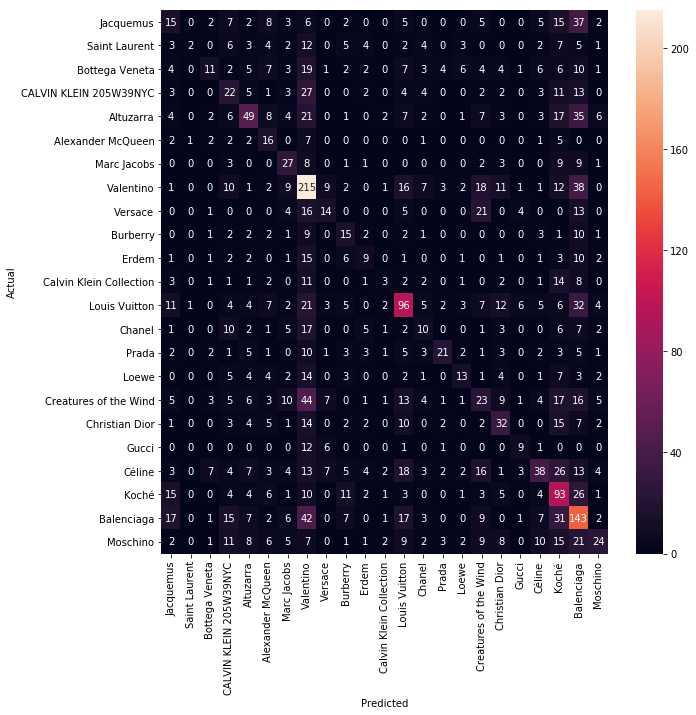

In [345]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [346]:
start=time.time()
lr=LogisticRegression(multi_class='ovr',
                     solver='saga',max_iter=4000
                     )
lr.fit(X_train, y_train)
display(lr.score(X_train,y_train))
display(lr.score(X_test, y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.4234194900454069

0.37988826815642457

runtime=41.40184187889099 seconds


In [347]:
start=time.time()
lr=LogisticRegression(multi_class='ovr',
                     solver='saga',max_iter=4000
                     )
lr.fit(X_train, y_train)
display(lr.score(X_train,y_train))
display(lr.score(X_test, y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.4234194900454069

0.37988826815642457

runtime=44.28427505493164 seconds


In [348]:
y_hat=lr.predict(X_test)
print(classification_report(y_test,y_hat))

                         precision    recall  f1-score   support

      Alexander McQueen       0.29      0.15      0.20       114
              Altuzarra       0.27      0.11      0.15        65
             Balenciaga       0.30      0.14      0.19       108
         Bottega Veneta       0.21      0.23      0.22       102
               Burberry       0.39      0.44      0.41       178
 CALVIN KLEIN 205W39NYC       0.25      0.21      0.23        39
Calvin Klein Collection       0.50      0.30      0.37        64
                 Chanel       0.43      0.72      0.54       359
         Christian Dior       0.45      0.47      0.46        78
  Creatures of the Wind       0.33      0.19      0.24        52
                 Céline       0.33      0.21      0.26        56
                  Erdem       0.38      0.17      0.23        53
                  Gucci       0.42      0.52      0.46       238
              Jacquemus       0.33      0.21      0.25        73
                  Koché 

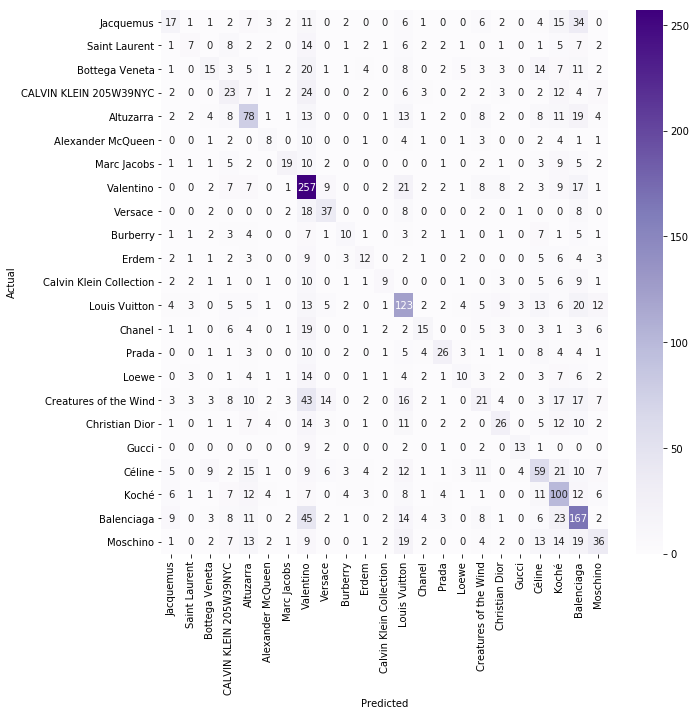

In [352]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y),cmap='Purples')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Logistic Regression VS Naive Bayes to predict season

In [305]:
import re

In [353]:
#remove dates
date_drop=re.compile(r'\d{4}')
data['season']=data.season.apply(lambda x: date_drop.sub('',x))

In [354]:
#Concat DataFrames
df=pd.concat([data,dummy_df],axis=1)

#These have too few images, only from one season and unlikely to be influential
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]

In [355]:
X=df[['year','designer']+list(color_vector_dict.keys())]
X=pd.concat([X,pd.get_dummies(X.year)],axis=1)
X=pd.concat([X,pd.get_dummies(X.designer)],axis=1)
X.drop(columns=['year','designer'],axis=1,inplace=True)
#predicting designer
y=df.season

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   shuffle=True,
                                                   test_size=0.2,
                                                   stratify=y)

In [357]:
start=time.time()
clf = MultinomialNB()
clf.fit(X_train, y_train)
display(clf.score(X_test,y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.48498603351955305

runtime=0.06987309455871582 seconds


In [358]:
y_hat=clf.predict(X_test)
print(classification_report(y_test,y_hat))

                       precision    recall  f1-score   support

        Fall  Couture       0.26      0.52      0.35        62
       Fall  Menswear       0.38      0.42      0.40       300
  Fall  Ready-to-Wear       0.48      0.53      0.51       787
            Pre-Fall        0.31      0.25      0.28        97
              Resort        0.63      0.61      0.62       421
      Spring  Couture       0.35      0.34      0.35        87
     Spring  Menswear       0.43      0.31      0.36       365
Spring  Ready-to-Wear       0.55      0.52      0.54       745

          avg / total       0.49      0.48      0.48      2864



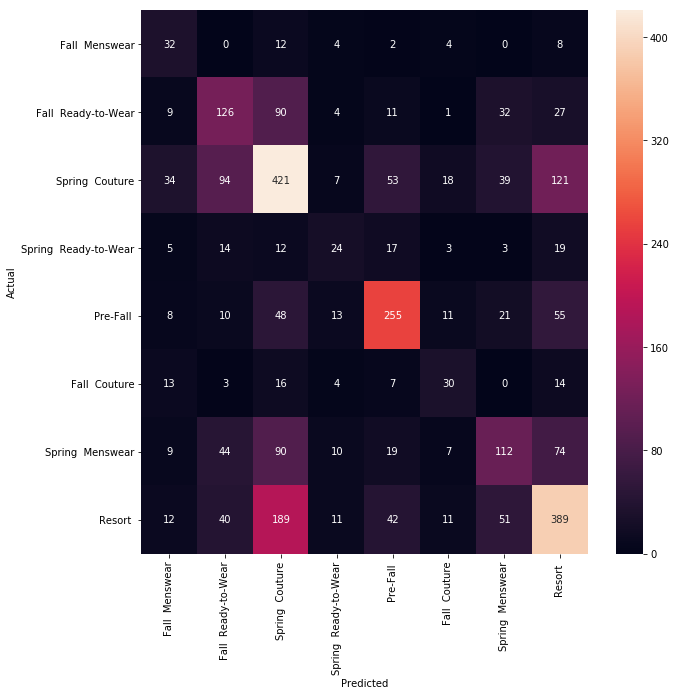

In [359]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [313]:
start=time.time()
lr=LogisticRegression(multi_class='ovr',
                     solver='saga',max_iter=4000
                     )
lr.fit(X_train, y_train)
display(lr.score(X_train,y_train))
display(lr.score(X_test, y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.562958435207824

0.5387569832402235

runtime=13.226251125335693 seconds


In [314]:
start=time.time()
lr=LogisticRegression(multi_class='multinomial',
                     solver='saga',max_iter=4000
                     )
lr.fit(X_train, y_train)
display(lr.score(X_train,y_train))
display(lr.score(X_test, y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.5667132378623821

0.5405027932960894

runtime=7.770718097686768 seconds


In [315]:
inv_map = {v: k for k, v in color_vector_dict.items()}
for i,x in enumerate(zip(lr.coef_,set(y))):
    try:print(x[1],inv_map[np.argmax(x[0])])
    except KeyError: pass

Spring  Menswear pale green


In [182]:
y_hat=lr.predict(X_test)
print(classification_report(y_test,y_hat))

                       precision    recall  f1-score   support

        Fall  Couture       0.45      0.48      0.47        62
       Fall  Menswear       0.44      0.38      0.41       300
  Fall  Ready-to-Wear       0.51      0.59      0.55       787
            Pre-Fall        0.37      0.27      0.31        97
              Resort        0.67      0.68      0.67       421
      Spring  Couture       0.53      0.47      0.50        87
     Spring  Menswear       0.46      0.34      0.39       365
Spring  Ready-to-Wear       0.59      0.62      0.60       745

          avg / total       0.53      0.54      0.54      2864



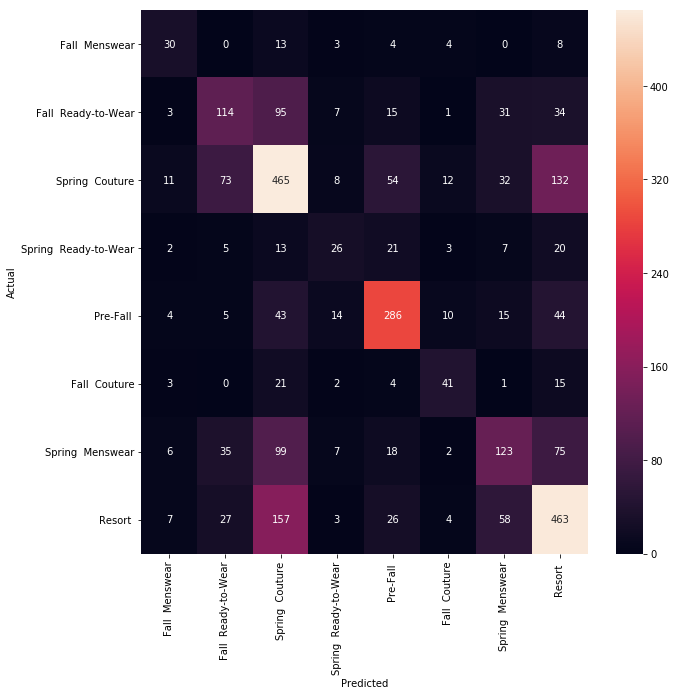

In [183]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Create A Pipeline to optimize

In [35]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

In [36]:
ss= StandardScaler()
lr = LogisticRegression(multi_class='multinomial',
                        solver='saga',
                        max_iter=4000)

In [37]:
lr_params = {
    'lr__penalty':['l1','l2'],
    'lr__C': [.1, .2, .5, .7, 1.0],

}

lr_pipe = Pipeline([
    ('ss', ss), # (name as string, actual object)
    ('lr', lr), 
    
])

In [38]:
start=time.time()
gs = GridSearchCV(lr_pipe,param_grid = lr_params)
gs.fit(X_train, y_train)
print (gs.best_score_)
print(gs.best_params_)
end=time.time()
print('runtime={} seconds'.format(end-start))

0.3695424380020957
{'lr__C': 0.2, 'lr__penalty': 'l1'}
runtime=9316.173439025879 seconds


# Try Term Frequency

In [249]:
#Concat DataFrames
df=pd.concat([data,term_frequency_df],axis=1)


In [250]:
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]

X=df[['year','season']+list(color_vector_dict.keys())]
X=pd.concat([X,pd.get_dummies(X.year)],axis=1)
X=pd.concat([X,pd.get_dummies(X.season)],axis=1)
X.drop(columns=['year','season'],axis=1,inplace=True)
#predicting designer
y=df.designer

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   shuffle=True,
                                                   test_size=0.2,
                                                   stratify=y)

In [251]:
start=time.time()
clf = MultinomialNB(alpha=.000001)
clf.fit(X_train, y_train)
display(clf.score(X_train, y_train))
display(clf.score(X_test,y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.23253580160670625

0.22486033519553073

runtime=0.10300111770629883 seconds


In [252]:
y_hat=clf.predict(X_test)
print(classification_report(y_test,y_hat))

                         precision    recall  f1-score   support

      Alexander McQueen       0.00      0.00      0.00       114
              Altuzarra       0.00      0.00      0.00        65
             Balenciaga       0.38      0.05      0.08       108
         Bottega Veneta       0.00      0.00      0.00       102
               Burberry       0.14      0.38      0.20       178
 CALVIN KLEIN 205W39NYC       0.33      0.03      0.05        39
Calvin Klein Collection       0.56      0.08      0.14        64
                 Chanel       0.27      0.64      0.38       359
         Christian Dior       0.36      0.38      0.37        78
  Creatures of the Wind       0.00      0.00      0.00        52
                 Céline       0.33      0.02      0.03        56
                  Erdem       0.00      0.00      0.00        53
                  Gucci       0.27      0.31      0.29       238
              Jacquemus       1.00      0.01      0.03        73
                  Koché 

/Users/frankturner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


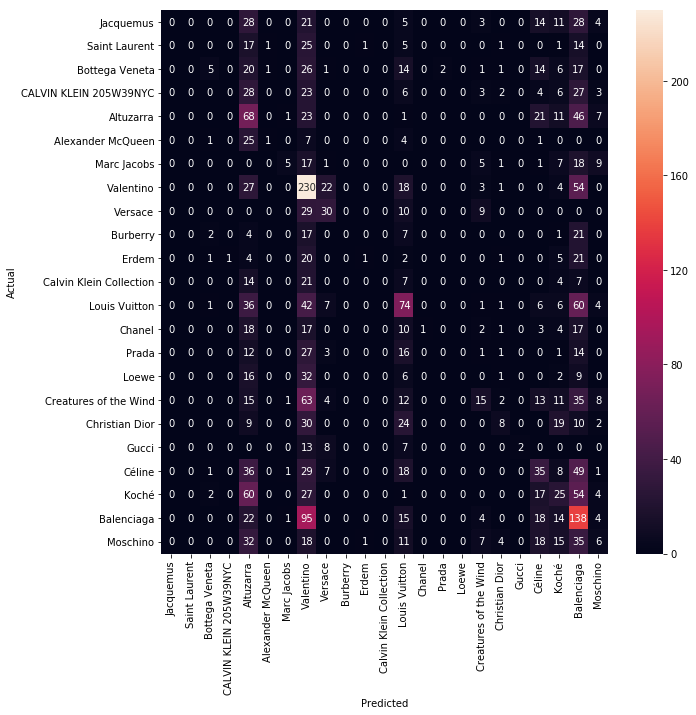

In [253]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [254]:
start=time.time()
lr=LogisticRegression(multi_class='multinomial',
                     solver='saga',max_iter=4000
                     )
lr.fit(X_train, y_train)
display(lr.score(X_train,y_train))
display(lr.score(X_test, y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.2907789032483409

0.2719972067039106

runtime=4.02061915397644 seconds


In [255]:
y_hat=clf.predict(X_test)
print(classification_report(y_test,y_hat))

                         precision    recall  f1-score   support

      Alexander McQueen       0.00      0.00      0.00       114
              Altuzarra       0.00      0.00      0.00        65
             Balenciaga       0.38      0.05      0.08       108
         Bottega Veneta       0.00      0.00      0.00       102
               Burberry       0.14      0.38      0.20       178
 CALVIN KLEIN 205W39NYC       0.33      0.03      0.05        39
Calvin Klein Collection       0.56      0.08      0.14        64
                 Chanel       0.27      0.64      0.38       359
         Christian Dior       0.36      0.38      0.37        78
  Creatures of the Wind       0.00      0.00      0.00        52
                 Céline       0.33      0.02      0.03        56
                  Erdem       0.00      0.00      0.00        53
                  Gucci       0.27      0.31      0.29       238
              Jacquemus       1.00      0.01      0.03        73
                  Koché 

/Users/frankturner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


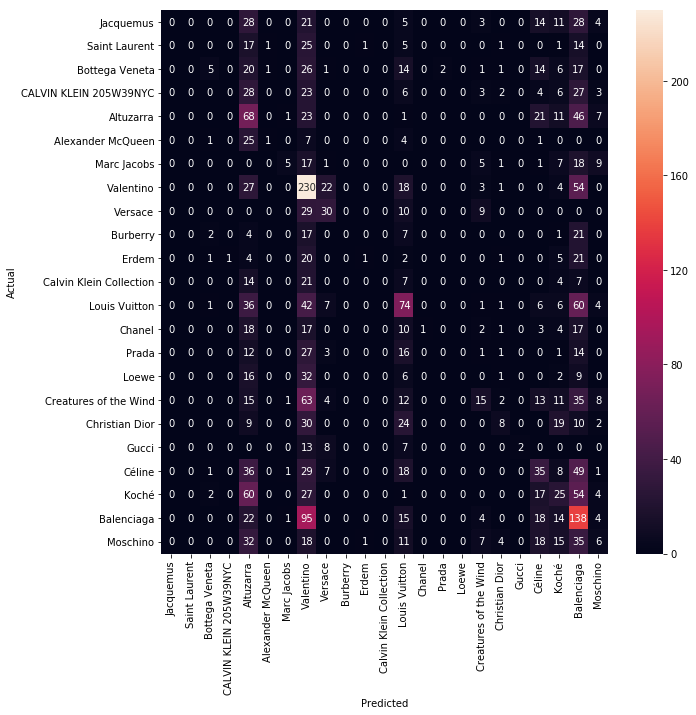

In [256]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Try TFIDF

In [261]:
import math

In [262]:
#calculate idf
idf=dict()
for color in dummy_df.keys():
    idf[color]=math.log(dummy_df.shape[0]/dummy_df.sum()[color])
    

In [263]:
tfidf_df=term_frequency_df.copy()

In [264]:
for color in tfidf_df.keys():
    tfidf_df[color]=tfidf_df[color]*idf[color]

In [265]:
tfidf_df.head()

,maroon,pale pink,medium blue,blue purple,hot pink,kelly green,navy blue,salmon,bright purple,pinkish red,...,sea blue,black,off white,dark magenta,yellowish green,greenish yellow,blue,red orange,robin's egg blue,grey blue
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.611177,0.006324,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052086,0.0,0.0,...,0.0,0.000000,0.007001,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.683601,0.006318,0.000000,0.0,0.0,0.0,0.0,0.177643,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.642228,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.012032,0.150465,0.0,0.0,0.0,0.0,0.000000,0.0


In [270]:
#Concat DataFrames
df=pd.concat([data,tfidf_df],axis=1)


In [267]:
df=df.copy()
df.drop(['look','color_frequency','color','season','month','year','designer'],axis=1,inplace=True)

In [268]:

df.groupby('designer_season').max().T.to_csv('./tfidf_for_visualization.csv')

In [271]:
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]

X=df[['year','season']+list(color_vector_dict.keys())]
X=pd.concat([X,pd.get_dummies(X.year)],axis=1)
X=pd.concat([X,pd.get_dummies(X.season)],axis=1)
X.drop(columns=['year','season'],axis=1,inplace=True)
#predicting designer
y=df.designer

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   shuffle=True,
                                                   test_size=0.2,
                                                   stratify=y)

In [272]:
start=time.time()
clf = MultinomialNB(alpha=.0001)
clf.fit(X_train, y_train)
display(clf.score(X_train, y_train))
display(clf.score(X_test,y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.2582954942368145

0.2363826815642458

runtime=0.09746813774108887 seconds


In [273]:
y_hat=clf.predict(X_test)
print(classification_report(y_test,y_hat))

                         precision    recall  f1-score   support

      Alexander McQueen       0.33      0.04      0.06       114
              Altuzarra       0.33      0.02      0.03        65
             Balenciaga       0.35      0.06      0.10       108
         Bottega Veneta       0.20      0.01      0.02       102
               Burberry       0.14      0.36      0.20       178
 CALVIN KLEIN 205W39NYC       0.23      0.13      0.16        39
Calvin Klein Collection       0.47      0.12      0.20        64
                 Chanel       0.25      0.64      0.36       359
         Christian Dior       0.27      0.31      0.29        78
  Creatures of the Wind       0.12      0.04      0.06        52
                 Céline       0.12      0.02      0.03        56
                  Erdem       0.00      0.00      0.00        53
                  Gucci       0.33      0.30      0.32       238
              Jacquemus       0.10      0.01      0.02        73
                  Koché 

/Users/frankturner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


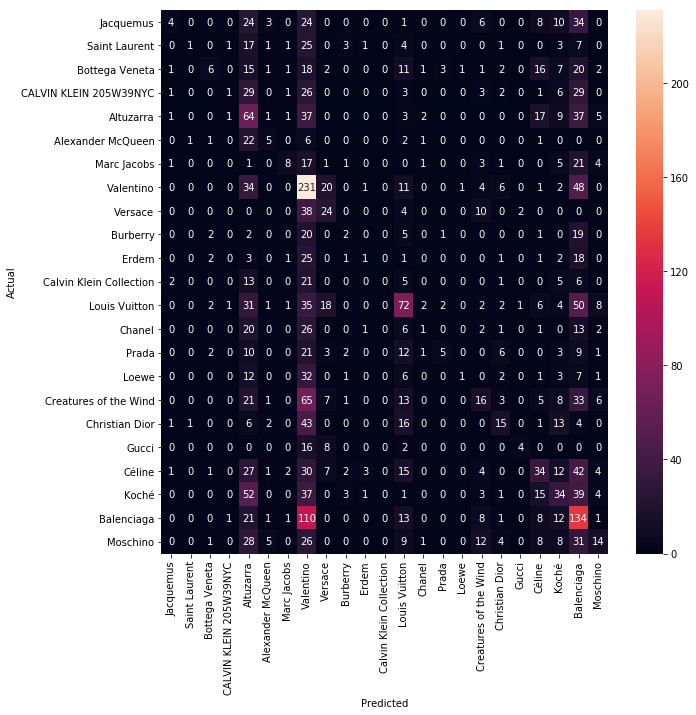

In [274]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [275]:
start=time.time()
lr=LogisticRegression(multi_class='multinomial',
                     solver='saga',max_iter=4000
                     )
lr.fit(X_train, y_train)
display(lr.score(X_train,y_train))
display(lr.score(X_test, y_test))
end=time.time()
print('runtime={} seconds'.format(end-start))

0.3120852252881593

0.2838687150837989

runtime=7.770673990249634 seconds


In [276]:
y_hat=clf.predict(X_test)
print(classification_report(y_test,y_hat))

                         precision    recall  f1-score   support

      Alexander McQueen       0.33      0.04      0.06       114
              Altuzarra       0.33      0.02      0.03        65
             Balenciaga       0.35      0.06      0.10       108
         Bottega Veneta       0.20      0.01      0.02       102
               Burberry       0.14      0.36      0.20       178
 CALVIN KLEIN 205W39NYC       0.23      0.13      0.16        39
Calvin Klein Collection       0.47      0.12      0.20        64
                 Chanel       0.25      0.64      0.36       359
         Christian Dior       0.27      0.31      0.29        78
  Creatures of the Wind       0.12      0.04      0.06        52
                 Céline       0.12      0.02      0.03        56
                  Erdem       0.00      0.00      0.00        53
                  Gucci       0.33      0.30      0.32       238
              Jacquemus       0.10      0.01      0.02        73
                  Koché 

/Users/frankturner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


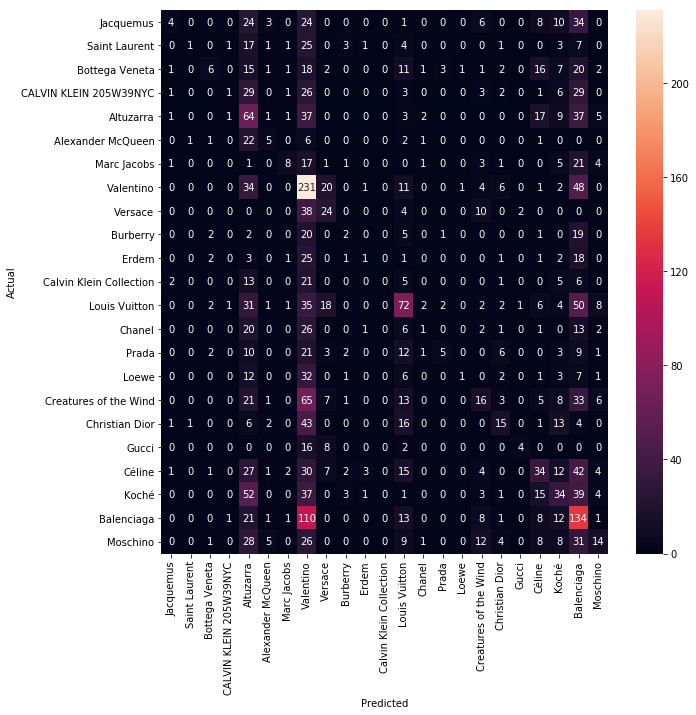

In [277]:
conf_mat = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=set(y), yticklabels=set(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [280]:
X.keys()

Index([               'maroon',             'pale pink',
                 'medium blue',           'blue purple',
                    'hot pink',           'kelly green',
                   'navy blue',                'salmon',
               'bright purple',           'pinkish red',
       ...
                          2017,                    2018,
               'Fall  Couture',        'Fall  Menswear',
         'Fall  Ready-to-Wear',             'Pre-Fall ',
                     'Resort ',       'Spring  Couture',
            'Spring  Menswear', 'Spring  Ready-to-Wear'],
      dtype='object', length=154)

In [288]:
lr.coef_.shape

(23, 154)

# Cosine Similarity

In [100]:
df=pd.concat([data,tfidf_df],axis=1)
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]
df.drop(['year'],axis=1,inplace=True)

In [101]:
from scipy import sparse
sparse_pivot = sparse.csr_matrix(df.groupby('designer_season').mean().fillna(0))

In [102]:
from sklearn.metrics.pairwise import pairwise_distances
distances = pairwise_distances(sparse_pivot, metric='cosine')

In [103]:
distance_df = pd.DataFrame(distances, index=df.groupby('designer_season').mean().T.columns , columns=df.groupby('designer_season').mean().T.columns )

In [104]:
distance_df.sum().sort_values()

designer_season
Saint Laurent_Fall 2015 Ready-to-Wear                115.060630
Chanel_Spring 2015 Ready-to-Wear                     119.707625
Christian Dior_Resort 2017                           119.804363
Louis Vuitton_Resort 2019                            121.558591
Chanel_Resort 2015                                   122.521974
Valentino_Pre-Fall 2015                              122.759622
Alexander McQueen_Spring 2017 Ready-to-Wear          122.974752
Versace_Spring 2016 Menswear                         123.893120
Christian Dior_Resort 2016                           124.397370
Balenciaga_Spring 2018 Menswear                      124.511861
Versace_Fall 2017 Menswear                           126.205040
Altuzarra_Spring 2015 Ready-to-Wear                  127.312565
Chanel_Fall 2018 Ready-to-Wear                       127.452968
Calvin Klein Collection_Fall 2015 Ready-to-Wear      127.587543
Prada_Spring 2017 Menswear                           127.744649
Burberry_Fall 2016 Ready

In [61]:
distance_df['Alexander McQueen_Fall 2015 Menswear'].sort_values()[1:11]

designer_season
Alexander McQueen_Fall 2018 Menswear               0.189947
Chanel_Fall 2015 Ready-to-Wear                     0.243101
Valentino_Fall 2015 Menswear                       0.250171
Christian Dior_Resort 2017                         0.252636
Calvin Klein Collection_Fall 2015 Ready-to-Wear    0.267797
Saint Laurent_Fall 2015 Ready-to-Wear              0.269333
Prada_Spring 2018 Ready-to-Wear                    0.279617
Chanel_Fall 2016 Couture                           0.285303
Bottega Veneta_Fall 2016 Menswear                  0.288095
Versace_Fall 2017 Menswear                         0.288776
Name: Alexander McQueen_Fall 2015 Menswear, dtype: float64

In [62]:
for show in distance_df.keys():
    display(show)
    display(distance_df[show].sort_values()[1:5])

'Alexander McQueen_Fall 2015 Menswear'

designer_season
Alexander McQueen_Fall 2018 Menswear    0.189947
Chanel_Fall 2015 Ready-to-Wear          0.243101
Valentino_Fall 2015 Menswear            0.250171
Christian Dior_Resort 2017              0.252636
Name: Alexander McQueen_Fall 2015 Menswear, dtype: float64

'Alexander McQueen_Fall 2015 Ready-to-Wear'

designer_season
Burberry_Fall 2015 Menswear                        0.085112
Calvin Klein Collection_Resort 2016                0.110229
Calvin Klein Collection_Fall 2016 Ready-to-Wear    0.132648
Burberry_Fall 2016 Menswear                        0.140633
Name: Alexander McQueen_Fall 2015 Ready-to-Wear, dtype: float64

'Alexander McQueen_Fall 2016 Menswear'

designer_season
Louis Vuitton_Fall 2016 Ready-to-Wear     0.098007
Bottega Veneta_Fall 2016 Ready-to-Wear    0.137329
Jacquemus_Fall 2017 Ready-to-Wear         0.151173
Bottega Veneta_Fall 2016 Menswear         0.177253
Name: Alexander McQueen_Fall 2016 Menswear, dtype: float64

'Alexander McQueen_Fall 2016 Ready-to-Wear'

designer_season
Erdem_Fall 2016 Ready-to-Wear          0.122736
Valentino_Spring 2016 Ready-to-Wear    0.185168
Burberry_Fall 2016 Ready-to-Wear       0.197489
Altuzarra_Fall 2018 Ready-to-Wear      0.198787
Name: Alexander McQueen_Fall 2016 Ready-to-Wear, dtype: float64

'Alexander McQueen_Fall 2017 Ready-to-Wear'

designer_season
Alexander McQueen_Spring 2018 Menswear       0.130535
Altuzarra_Spring 2018 Ready-to-Wear          0.170685
Alexander McQueen_Fall 2016 Ready-to-Wear    0.201341
Erdem_Spring 2017 Ready-to-Wear              0.213414
Name: Alexander McQueen_Fall 2017 Ready-to-Wear, dtype: float64

'Alexander McQueen_Fall 2018 Menswear'

designer_season
Valentino_Fall 2015 Menswear          0.116536
Chanel_Fall 2015 Ready-to-Wear        0.142762
Saint Laurent_Spring 2015 Menswear    0.169189
Chanel_Pre-Fall 2015                  0.184296
Name: Alexander McQueen_Fall 2018 Menswear, dtype: float64

'Alexander McQueen_Fall 2018 Ready-to-Wear'

designer_season
Altuzarra_Fall 2017 Ready-to-Wear        0.129269
Saint Laurent_Fall 2018 Ready-to-Wear    0.142494
Bottega Veneta_Fall 2016 Menswear        0.172860
Balenciaga_Fall 2017 Ready-to-Wear       0.176911
Name: Alexander McQueen_Fall 2018 Ready-to-Wear, dtype: float64

'Alexander McQueen_Spring 2015 Menswear'

designer_season
Burberry_Spring 2016 Ready-to-Wear                   0.274811
Calvin Klein Collection_Spring 2016 Ready-to-Wear    0.309976
Valentino_Fall 2015 Ready-to-Wear                    0.324690
Gucci_Spring 2015 Menswear                           0.332640
Name: Alexander McQueen_Spring 2015 Menswear, dtype: float64

'Alexander McQueen_Spring 2015 Ready-to-Wear'

designer_season
Chanel_Pre-Fall 2017                  0.088183
Saint Laurent_Spring 2015 Menswear    0.093020
Chanel_Resort 2016                    0.108960
Valentino_Fall 2015 Menswear          0.124118
Name: Alexander McQueen_Spring 2015 Ready-to-Wear, dtype: float64

'Alexander McQueen_Spring 2016 Menswear'

designer_season
Burberry_Spring 2017 Menswear         0.237319
Burberry_Spring 2017 Ready-to-Wear    0.237319
Valentino_Spring 2016 Menswear        0.241474
Valentino_Fall 2015 Ready-to-Wear     0.279883
Name: Alexander McQueen_Spring 2016 Menswear, dtype: float64

'Alexander McQueen_Spring 2016 Ready-to-Wear'

designer_season
Valentino_Fall 2015 Ready-to-Wear                    0.177470
Chanel_Resort 2014                                   0.203557
Burberry_Spring 2016 Ready-to-Wear                   0.217962
Calvin Klein Collection_Spring 2016 Ready-to-Wear    0.220667
Name: Alexander McQueen_Spring 2016 Ready-to-Wear, dtype: float64

'Alexander McQueen_Spring 2017 Ready-to-Wear'

designer_season
Valentino_Fall 2015 Ready-to-Wear    0.115608
Versace_Fall 2017 Menswear           0.137342
Prada_Resort 2018                    0.145178
Balenciaga_Spring 2017 Menswear      0.151157
Name: Alexander McQueen_Spring 2017 Ready-to-Wear, dtype: float64

'Alexander McQueen_Spring 2018 Menswear'

designer_season
Alexander McQueen_Fall 2017 Ready-to-Wear    0.130535
Erdem_Fall 2016 Ready-to-Wear                0.176339
Louis Vuitton_Spring 2015 Ready-to-Wear      0.212702
Valentino_Spring 2016 Ready-to-Wear          0.213668
Name: Alexander McQueen_Spring 2018 Menswear, dtype: float64

'Alexander McQueen_Spring 2018 Ready-to-Wear'

designer_season
Alexander McQueen_Spring 2018 Menswear              0.225109
Jacquemus_Fall 2018 Ready-to-Wear                   0.235619
CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear    0.275215
Valentino_Spring 2018 Ready-to-Wear                 0.280457
Name: Alexander McQueen_Spring 2018 Ready-to-Wear, dtype: float64

'Alexander McQueen_Spring 2019 Menswear'

designer_season
Chanel_Fall 2015 Couture     0.104638
Louis Vuitton_Resort 2015    0.111167
Louis Vuitton_Resort 2016    0.118816
Gucci_Resort 2017            0.120144
Name: Alexander McQueen_Spring 2019 Menswear, dtype: float64

'Altuzarra_Fall 2015 Ready-to-Wear'

designer_season
Chanel_Pre-Fall 2017                           0.124585
Saint Laurent_Spring 2015 Menswear             0.142255
Alexander McQueen_Spring 2015 Ready-to-Wear    0.191307
Calvin Klein Collection_Resort 2015            0.197683
Name: Altuzarra_Fall 2015 Ready-to-Wear, dtype: float64

'Altuzarra_Fall 2016 Ready-to-Wear'

designer_season
Versace_Fall 2016 Menswear           0.284144
Burberry_Fall 2017 Ready-to-Wear     0.293778
Burberry_Fall 2017 Menswear          0.293778
Creatures of the Wind_Resort 2017    0.295214
Name: Altuzarra_Fall 2016 Ready-to-Wear, dtype: float64

'Altuzarra_Fall 2017 Ready-to-Wear'

designer_season
Alexander McQueen_Fall 2018 Ready-to-Wear           0.129269
Balenciaga_Fall 2017 Ready-to-Wear                  0.218789
CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear    0.228456
Saint Laurent_Fall 2018 Ready-to-Wear               0.240748
Name: Altuzarra_Fall 2017 Ready-to-Wear, dtype: float64

'Altuzarra_Fall 2018 Ready-to-Wear'

designer_season
Erdem_Fall 2016 Ready-to-Wear                0.096053
Bottega Veneta_Fall 2016 Menswear            0.187609
Alexander McQueen_Fall 2016 Ready-to-Wear    0.198787
Burberry_Fall 2016 Ready-to-Wear             0.207269
Name: Altuzarra_Fall 2018 Ready-to-Wear, dtype: float64

'Altuzarra_Spring 2015 Ready-to-Wear'

designer_season
Chanel_Resort 2015                               0.165910
Chanel_Resort 2017                               0.172223
Burberry_Spring 2016 Ready-to-Wear               0.178709
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.191090
Name: Altuzarra_Spring 2015 Ready-to-Wear, dtype: float64

'Altuzarra_Spring 2016 Ready-to-Wear'

designer_season
Saint Laurent_Fall 2017 Ready-to-Wear    0.334426
Marc Jacobs_Fall 2015 Ready-to-Wear      0.363381
Christian Dior_Resort 2014               0.369663
Valentino_Resort 2017                    0.389941
Name: Altuzarra_Spring 2016 Ready-to-Wear, dtype: float64

'Altuzarra_Spring 2017 Ready-to-Wear'

designer_season
Chanel_Spring 2015 Ready-to-Wear    0.261835
Chanel_Spring 2017 Ready-to-Wear    0.261836
Gucci_Fall 2018 Ready-to-Wear       0.276738
Burberry_Fall 2017 Menswear         0.286253
Name: Altuzarra_Spring 2017 Ready-to-Wear, dtype: float64

'Altuzarra_Spring 2018 Ready-to-Wear'

designer_season
Christian Dior_Resort 2016          0.146304
Erdem_Spring 2017 Ready-to-Wear     0.154847
Louis Vuitton_Fall 2015 Menswear    0.161032
Louis Vuitton_Resort 2019           0.168223
Name: Altuzarra_Spring 2018 Ready-to-Wear, dtype: float64

'Balenciaga_Fall 2015 Ready-to-Wear'

designer_season
Gucci_Resort 2017                       0.022240
Louis Vuitton_Resort 2016               0.022670
Balenciaga_Spring 2015 Ready-to-Wear    0.022973
Burberry_Spring 2015 Ready-to-Wear      0.037780
Name: Balenciaga_Fall 2015 Ready-to-Wear, dtype: float64

'Balenciaga_Fall 2016 Ready-to-Wear'

designer_season
Balenciaga_Fall 2018 Ready-to-Wear    0.227915
Balenciaga_Spring 2018 Menswear       0.254752
Burberry_Fall 2016 Ready-to-Wear      0.256818
Versace_Fall 2017 Ready-to-Wear       0.259343
Name: Balenciaga_Fall 2016 Ready-to-Wear, dtype: float64

'Balenciaga_Fall 2017 Menswear'

designer_season
Calvin Klein Collection_Resort 2016    0.143755
Burberry_Fall 2015 Menswear            0.162650
Céline_Fall 2017 Ready-to-Wear         0.186408
Burberry_Fall 2016 Menswear            0.203533
Name: Balenciaga_Fall 2017 Menswear, dtype: float64

'Balenciaga_Fall 2017 Ready-to-Wear'

designer_season
Versace_Fall 2017 Ready-to-Wear                   0.140273
Saint Laurent_Fall 2018 Ready-to-Wear             0.160729
CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear    0.165003
Louis Vuitton_Spring 2017 Menswear                0.171792
Name: Balenciaga_Fall 2017 Ready-to-Wear, dtype: float64

'Balenciaga_Fall 2018 Ready-to-Wear'

designer_season
Prada_Spring 2017 Menswear            0.226764
Balenciaga_Fall 2016 Ready-to-Wear    0.227915
Versace_Fall 2017 Ready-to-Wear       0.255587
Versace_Fall 2016 Ready-to-Wear       0.288508
Name: Balenciaga_Fall 2018 Ready-to-Wear, dtype: float64

'Balenciaga_Resort 2015'

designer_season
Calvin Klein Collection_Resort 2016    0.116230
Prada_Fall 2016 Ready-to-Wear          0.136397
Burberry_Fall 2015 Menswear            0.157615
Burberry_Fall 2016 Menswear            0.164994
Name: Balenciaga_Resort 2015, dtype: float64

'Balenciaga_Spring 2015 Menswear'

designer_season
Calvin Klein Collection_Fall 2016 Ready-to-Wear    0.135021
Saint Laurent_Fall 2015 Menswear                   0.139613
Prada_Spring 2016 Menswear                         0.198922
Valentino_Pre-Fall 2015                            0.203877
Name: Balenciaga_Spring 2015 Menswear, dtype: float64

'Balenciaga_Spring 2015 Ready-to-Wear'

designer_season
Balenciaga_Fall 2015 Ready-to-Wear    0.022973
Louis Vuitton_Resort 2016             0.025672
Gucci_Resort 2017                     0.030715
Chanel_Pre-Fall 2015                  0.040597
Name: Balenciaga_Spring 2015 Ready-to-Wear, dtype: float64

'Balenciaga_Spring 2016 Ready-to-Wear'

designer_season
Chanel_Resort 2014                          0.261251
Bottega Veneta_Spring 2016 Ready-to-Wear    0.283861
Chanel_Resort 2018                          0.314840
Jacquemus_Spring 2018 Ready-to-Wear         0.383253
Name: Balenciaga_Spring 2016 Ready-to-Wear, dtype: float64

'Balenciaga_Spring 2017 Menswear'

designer_season
Versace_Fall 2017 Menswear                     0.117653
Alexander McQueen_Spring 2017 Ready-to-Wear    0.151157
Valentino_Fall 2015 Ready-to-Wear              0.170324
Valentino_Pre-Fall 2016                        0.178263
Name: Balenciaga_Spring 2017 Menswear, dtype: float64

'Balenciaga_Spring 2017 Ready-to-Wear'

designer_season
Alexander McQueen_Fall 2015 Ready-to-Wear          0.289668
Creatures of the Wind_Spring 2015 Ready-to-Wear    0.307320
Koché_Pre-Fall 2018                                0.328774
Creatures of the Wind_Fall 2017 Ready-to-Wear      0.330063
Name: Balenciaga_Spring 2017 Ready-to-Wear, dtype: float64

'Balenciaga_Spring 2018 Menswear'

designer_season
Creatures of the Wind_Resort 2017    0.230731
Prada_Spring 2017 Menswear           0.231398
Christian Dior_Resort 2017           0.236334
Valentino_Spring 2016 Menswear       0.244027
Name: Balenciaga_Spring 2018 Menswear, dtype: float64

'Balenciaga_Spring 2018 Ready-to-Wear'

designer_season
Chanel_Spring 2017 Ready-to-Wear           0.245542
Balenciaga_Spring 2018 Menswear            0.262520
Versace_Spring 2017 Ready-to-Wear          0.266871
Louis Vuitton_Spring 2016 Ready-to-Wear    0.297354
Name: Balenciaga_Spring 2018 Ready-to-Wear, dtype: float64

'Bottega Veneta_Fall 2015 Menswear'

designer_season
Saint Laurent_Pre-Fall 2016         0.149253
Saint Laurent_Fall 2016 Menswear    0.149253
Christian Dior_Resort 2019          0.150697
Prada_Fall 2018 Menswear            0.157297
Name: Bottega Veneta_Fall 2015 Menswear, dtype: float64

'Bottega Veneta_Fall 2015 Ready-to-Wear'

designer_season
Calvin Klein Collection_Fall 2015 Menswear    0.147885
Loewe_Fall 2017 Ready-to-Wear                 0.161164
Chanel_Fall 2017 Couture                      0.187666
Bottega Veneta_Fall 2015 Menswear             0.194466
Name: Bottega Veneta_Fall 2015 Ready-to-Wear, dtype: float64

'Bottega Veneta_Fall 2016 Menswear'

designer_season
Erdem_Fall 2016 Ready-to-Wear                      0.069132
Saint Laurent_Fall 2018 Ready-to-Wear              0.107184
Louis Vuitton_Fall 2016 Menswear                   0.153407
Calvin Klein Collection_Fall 2015 Ready-to-Wear    0.156498
Name: Bottega Veneta_Fall 2016 Menswear, dtype: float64

'Bottega Veneta_Fall 2016 Ready-to-Wear'

designer_season
Jacquemus_Fall 2017 Ready-to-Wear             0.087608
Louis Vuitton_Fall 2016 Menswear              0.093055
Calvin Klein Collection_Fall 2016 Menswear    0.120053
Louis Vuitton_Fall 2016 Ready-to-Wear         0.120855
Name: Bottega Veneta_Fall 2016 Ready-to-Wear, dtype: float64

'Bottega Veneta_Fall 2017 Ready-to-Wear'

designer_season
Bottega Veneta_Fall 2016 Ready-to-Wear     0.154304
Louis Vuitton_Spring 2018 Ready-to-Wear    0.168710
Erdem_Fall 2016 Ready-to-Wear              0.190124
Valentino_Spring 2016 Ready-to-Wear        0.194042
Name: Bottega Veneta_Fall 2017 Ready-to-Wear, dtype: float64

'Bottega Veneta_Fall 2018 Ready-to-Wear'

designer_season
Bottega Veneta_Fall 2017 Ready-to-Wear     0.239905
Prada_Spring 2016 Ready-to-Wear            0.285789
Valentino_Spring 2016 Ready-to-Wear        0.285824
Saint Laurent_Spring 2015 Ready-to-Wear    0.286208
Name: Bottega Veneta_Fall 2018 Ready-to-Wear, dtype: float64

'Bottega Veneta_Spring 2015 Menswear'

designer_season
Chanel_Resort 2017                          0.179402
Céline_Fall 2016 Ready-to-Wear              0.196909
Bottega Veneta_Spring 2015 Ready-to-Wear    0.203698
Loewe_Fall 2018 Ready-to-Wear               0.204211
Name: Bottega Veneta_Spring 2015 Menswear, dtype: float64

'Bottega Veneta_Spring 2015 Ready-to-Wear'

designer_season
Chanel_Fall 2016 Couture               0.077649
Marc Jacobs_Fall 2016 Ready-to-Wear    0.095245
Prada_Fall 2018 Menswear               0.106167
Loewe_Fall 2018 Ready-to-Wear          0.113195
Name: Bottega Veneta_Spring 2015 Ready-to-Wear, dtype: float64

'Bottega Veneta_Spring 2016 Menswear'

designer_season
Louis Vuitton_Resort 2018           0.180647
Versace_Fall 2015 Menswear          0.252693
Koché_Fall 2018 Ready-to-Wear       0.261291
Louis Vuitton_Fall 2015 Menswear    0.281340
Name: Bottega Veneta_Spring 2016 Menswear, dtype: float64

'Bottega Veneta_Spring 2016 Ready-to-Wear'

designer_season
Versace_Fall 2015 Menswear           0.201492
Chanel_Resort 2014                   0.211313
Jacquemus_Fall 2018 Ready-to-Wear    0.213198
Gucci_Fall 2017 Ready-to-Wear        0.227099
Name: Bottega Veneta_Spring 2016 Ready-to-Wear, dtype: float64

'Bottega Veneta_Spring 2017 Ready-to-Wear'

designer_season
Jacquemus_Spring 2015 Ready-to-Wear            0.272386
Louis Vuitton_Fall 2015 Ready-to-Wear          0.331167
Loewe_Spring 2016 Ready-to-Wear                0.379070
Alexander McQueen_Spring 2016 Ready-to-Wear    0.452627
Name: Bottega Veneta_Spring 2017 Ready-to-Wear, dtype: float64

'Bottega Veneta_Spring 2018 Ready-to-Wear'

designer_season
Altuzarra_Spring 2018 Ready-to-Wear    0.242873
Valentino_Spring 2015 Ready-to-Wear    0.302940
Gucci_Fall 2017 Ready-to-Wear          0.321921
Erdem_Spring 2017 Ready-to-Wear        0.322841
Name: Bottega Veneta_Spring 2018 Ready-to-Wear, dtype: float64

'Burberry_Fall 2015 Menswear'

designer_season
Burberry_Fall 2016 Menswear                  0.047008
Calvin Klein Collection_Resort 2016          0.076767
Saint Laurent_Spring 2019 Menswear           0.083832
Alexander McQueen_Fall 2015 Ready-to-Wear    0.085112
Name: Burberry_Fall 2015 Menswear, dtype: float64

'Burberry_Fall 2015 Ready-to-Wear'

designer_season
Saint Laurent_Fall 2015 Ready-to-Wear      0.205079
Chanel_Resort 2015                         0.219017
Saint Laurent_Spring 2015 Ready-to-Wear    0.222310
Prada_Fall 2017 Ready-to-Wear              0.237890
Name: Burberry_Fall 2015 Ready-to-Wear, dtype: float64

'Burberry_Fall 2016 Menswear'

designer_season
Burberry_Fall 2015 Menswear            0.047008
Saint Laurent_Spring 2019 Menswear     0.064214
Prada_Fall 2016 Ready-to-Wear          0.088976
Calvin Klein Collection_Resort 2016    0.098635
Name: Burberry_Fall 2016 Menswear, dtype: float64

'Burberry_Fall 2016 Ready-to-Wear'

designer_season
Valentino_Spring 2017 Menswear             0.063215
Valentino_Fall 2016 Menswear               0.090135
Erdem_Fall 2018 Ready-to-Wear              0.119384
Saint Laurent_Spring 2017 Ready-to-Wear    0.129798
Name: Burberry_Fall 2016 Ready-to-Wear, dtype: float64

'Burberry_Fall 2017 Menswear'

designer_season
Burberry_Fall 2017 Ready-to-Wear                    2.220446e-16
CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear    1.762250e-01
Alexander McQueen_Fall 2018 Ready-to-Wear           1.947595e-01
Valentino_Fall 2016 Menswear                        2.268325e-01
Name: Burberry_Fall 2017 Menswear, dtype: float64

'Burberry_Fall 2017 Ready-to-Wear'

designer_season
Burberry_Fall 2017 Menswear                         2.220446e-16
CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear    1.762250e-01
Alexander McQueen_Fall 2018 Ready-to-Wear           1.947595e-01
Valentino_Fall 2016 Menswear                        2.268325e-01
Name: Burberry_Fall 2017 Ready-to-Wear, dtype: float64

'Burberry_Fall 2018 Menswear'

designer_season
Burberry_Fall 2018 Menswear                 0.000000
Prada_Fall 2018 Menswear                    0.143892
Prada_Spring 2018 Ready-to-Wear             0.179595
Bottega Veneta_Spring 2015 Ready-to-Wear    0.186707
Name: Burberry_Fall 2018 Menswear, dtype: float64

'Burberry_Fall 2018 Ready-to-Wear'

designer_season
Burberry_Fall 2018 Menswear                 0.000000
Prada_Fall 2018 Menswear                    0.143892
Prada_Spring 2018 Ready-to-Wear             0.179595
Bottega Veneta_Spring 2015 Ready-to-Wear    0.186707
Name: Burberry_Fall 2018 Ready-to-Wear, dtype: float64

'Burberry_Spring 2015 Menswear'

designer_season
Burberry_Spring 2015 Ready-to-Wear    0.066878
Gucci_Resort 2017                     0.080421
Louis Vuitton_Resort 2016             0.081329
Koché_Fall 2017 Ready-to-Wear         0.081975
Name: Burberry_Spring 2015 Menswear, dtype: float64

'Burberry_Spring 2015 Ready-to-Wear'

designer_season
Gucci_Fall 2018 Menswear              0.027599
Koché_Fall 2017 Ready-to-Wear         0.031997
Louis Vuitton_Resort 2016             0.037013
Balenciaga_Fall 2015 Ready-to-Wear    0.037780
Name: Burberry_Spring 2015 Ready-to-Wear, dtype: float64

'Burberry_Spring 2016 Menswear'

designer_season
Louis Vuitton_Fall 2015 Menswear                   0.145624
Chanel_Fall 2017 Ready-to-Wear                     0.174092
Chanel_Fall 2017 Couture                           0.179856
Calvin Klein Collection_Fall 2015 Ready-to-Wear    0.182388
Name: Burberry_Spring 2016 Menswear, dtype: float64

'Burberry_Spring 2016 Ready-to-Wear'

designer_season
Marc Jacobs_Resort 2016       0.136077
Louis Vuitton_Resort 2019     0.154685
Chanel_Fall 2016 Couture      0.161925
Christian Dior_Resort 2015    0.171773
Name: Burberry_Spring 2016 Ready-to-Wear, dtype: float64

'Burberry_Spring 2017 Menswear'

designer_season
Burberry_Spring 2017 Ready-to-Wear    3.330669e-16
Chanel_Fall 2016 Couture              8.812142e-02
Valentino_Spring 2017 Menswear        1.147736e-01
Louis Vuitton_Resort 2019             1.260738e-01
Name: Burberry_Spring 2017 Menswear, dtype: float64

'Burberry_Spring 2017 Ready-to-Wear'

designer_season
Burberry_Spring 2017 Menswear     3.330669e-16
Chanel_Fall 2016 Couture          8.812142e-02
Valentino_Spring 2017 Menswear    1.147736e-01
Louis Vuitton_Resort 2019         1.260738e-01
Name: Burberry_Spring 2017 Ready-to-Wear, dtype: float64

'CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear'

designer_season
Louis Vuitton_Spring 2017 Menswear    0.127874
Versace_Fall 2017 Ready-to-Wear       0.147351
Balenciaga_Fall 2017 Ready-to-Wear    0.165003
Louis Vuitton_Fall 2015 Menswear      0.184923
Name: CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear, dtype: float64

'CALVIN KLEIN 205W39NYC_Fall 2018 Ready-to-Wear'

designer_season
Chanel_Spring 2016 Couture         0.274618
Chanel_Resort 2015                 0.364465
Gucci_Resort 2018                  0.381429
Erdem_Spring 2018 Ready-to-Wear    0.390044
Name: CALVIN KLEIN 205W39NYC_Fall 2018 Ready-to-Wear, dtype: float64

'CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear'

designer_season
Burberry_Fall 2017 Menswear                  0.176225
Burberry_Fall 2017 Ready-to-Wear             0.176225
Alexander McQueen_Fall 2018 Ready-to-Wear    0.186467
Gucci_Fall 2018 Ready-to-Wear                0.188445
Name: CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear, dtype: float64

'Calvin Klein Collection_Fall 2015 Menswear'

designer_season
Chanel_Fall 2017 Couture              0.073925
Valentino_Fall 2018 Menswear          0.089685
Loewe_Fall 2017 Ready-to-Wear         0.108966
Louis Vuitton_Spring 2017 Menswear    0.144741
Name: Calvin Klein Collection_Fall 2015 Menswear, dtype: float64

'Calvin Klein Collection_Fall 2015 Ready-to-Wear'

designer_season
Chanel_Fall 2017 Couture                 0.140548
Bottega Veneta_Fall 2016 Menswear        0.156498
Saint Laurent_Fall 2018 Ready-to-Wear    0.158596
Valentino_Fall 2018 Menswear             0.170593
Name: Calvin Klein Collection_Fall 2015 Ready-to-Wear, dtype: float64

'Calvin Klein Collection_Fall 2016 Menswear'

designer_season
Jacquemus_Fall 2017 Ready-to-Wear         0.070428
Jacquemus_Fall 2016 Ready-to-Wear         0.082741
Bottega Veneta_Fall 2016 Ready-to-Wear    0.120053
Louis Vuitton_Fall 2016 Menswear          0.132851
Name: Calvin Klein Collection_Fall 2016 Menswear, dtype: float64

'Calvin Klein Collection_Fall 2016 Ready-to-Wear'

designer_season
Alexander McQueen_Fall 2015 Ready-to-Wear    0.132648
Balenciaga_Spring 2015 Menswear              0.135021
Calvin Klein Collection_Resort 2016          0.140671
Saint Laurent_Fall 2015 Menswear             0.149775
Name: Calvin Klein Collection_Fall 2016 Ready-to-Wear, dtype: float64

'Calvin Klein Collection_Resort 2015'

designer_season
Chanel_Pre-Fall 2017                           0.131123
Altuzarra_Fall 2015 Ready-to-Wear              0.197683
Alexander McQueen_Spring 2015 Ready-to-Wear    0.233143
Céline_Spring 2015 Ready-to-Wear               0.259403
Name: Calvin Klein Collection_Resort 2015, dtype: float64

'Calvin Klein Collection_Resort 2016'

designer_season
Burberry_Fall 2015 Menswear                  0.076767
Burberry_Fall 2016 Menswear                  0.098635
Alexander McQueen_Fall 2015 Ready-to-Wear    0.110229
Balenciaga_Resort 2015                       0.116230
Name: Calvin Klein Collection_Resort 2016, dtype: float64

'Calvin Klein Collection_Spring 2015 Menswear'

designer_season
Altuzarra_Fall 2018 Ready-to-Wear            0.326116
Jacquemus_Spring 2017 Ready-to-Wear          0.392606
Erdem_Fall 2016 Ready-to-Wear                0.412298
Alexander McQueen_Fall 2016 Ready-to-Wear    0.425563
Name: Calvin Klein Collection_Spring 2015 Menswear, dtype: float64

'Calvin Klein Collection_Spring 2015 Ready-to-Wear'

designer_season
Christian Dior_Resort 2014            0.193781
Louis Vuitton_Spring 2016 Menswear    0.214299
Valentino_Spring 2015 Menswear        0.385416
Moschino_Resort 2014                  0.388993
Name: Calvin Klein Collection_Spring 2015 Ready-to-Wear, dtype: float64

'Calvin Klein Collection_Spring 2016 Menswear'

designer_season
Versace_Fall 2016 Ready-to-Wear            0.096319
Versace_Fall 2016 Menswear                 0.132791
Prada_Spring 2017 Menswear                 0.194980
Louis Vuitton_Spring 2016 Ready-to-Wear    0.199911
Name: Calvin Klein Collection_Spring 2016 Menswear, dtype: float64

'Calvin Klein Collection_Spring 2016 Ready-to-Wear'

designer_season
Valentino_Fall 2015 Ready-to-Wear              0.154887
Burberry_Spring 2016 Ready-to-Wear             0.188741
Alexander McQueen_Spring 2016 Ready-to-Wear    0.220667
Louis Vuitton_Resort 2018                      0.250127
Name: Calvin Klein Collection_Spring 2016 Ready-to-Wear, dtype: float64

'Chanel_Fall 2015 Couture'

designer_season
Céline_Spring 2018 Ready-to-Wear    0.049114
Louis Vuitton_Resort 2016           0.052919
Chanel_Resort 2016                  0.059921
Louis Vuitton_Resort 2015           0.062467
Name: Chanel_Fall 2015 Couture, dtype: float64

'Chanel_Fall 2015 Ready-to-Wear'

designer_season
Valentino_Fall 2015 Menswear            0.114189
Chanel_Resort 2015                      0.128418
Chanel_Fall 2015 Couture                0.135952
Alexander McQueen_Fall 2018 Menswear    0.142762
Name: Chanel_Fall 2015 Ready-to-Wear, dtype: float64

'Chanel_Fall 2016 Couture'

designer_season
Bottega Veneta_Spring 2015 Ready-to-Wear    0.077649
Burberry_Spring 2017 Menswear               0.088121
Burberry_Spring 2017 Ready-to-Wear          0.088121
Valentino_Fall 2016 Menswear                0.102951
Name: Chanel_Fall 2016 Couture, dtype: float64

'Chanel_Fall 2016 Ready-to-Wear'

designer_season
Chanel_Spring 2015 Ready-to-Wear             0.218948
Valentino_Spring 2017 Ready-to-Wear          0.238804
Marc Jacobs_Spring 2018 Ready-to-Wear        0.243632
Alexander McQueen_Fall 2017 Ready-to-Wear    0.278089
Name: Chanel_Fall 2016 Ready-to-Wear, dtype: float64

'Chanel_Fall 2017 Couture'

designer_season
Valentino_Fall 2018 Menswear                  0.044179
Louis Vuitton_Spring 2017 Menswear            0.051960
Loewe_Fall 2017 Ready-to-Wear                 0.066838
Calvin Klein Collection_Fall 2015 Menswear    0.073925
Name: Chanel_Fall 2017 Couture, dtype: float64

'Chanel_Fall 2017 Ready-to-Wear'

designer_season
Jacquemus_Spring 2016 Ready-to-Wear           0.110679
Jacquemus_Fall 2017 Ready-to-Wear             0.131402
Calvin Klein Collection_Fall 2016 Menswear    0.149342
Chanel_Fall 2017 Couture                      0.150696
Name: Chanel_Fall 2017 Ready-to-Wear, dtype: float64

'Chanel_Fall 2018 Ready-to-Wear'

designer_season
Chanel_Resort 2015                                 0.189931
Chanel_Fall 2015 Ready-to-Wear                     0.199110
Calvin Klein Collection_Fall 2015 Ready-to-Wear    0.218892
Saint Laurent_Fall 2015 Ready-to-Wear              0.232638
Name: Chanel_Fall 2018 Ready-to-Wear, dtype: float64

'Chanel_Pre-Fall 2015'

designer_season
Gucci_Resort 2017                       0.031863
Louis Vuitton_Resort 2016               0.032967
Balenciaga_Spring 2015 Ready-to-Wear    0.040597
Balenciaga_Fall 2015 Ready-to-Wear      0.051098
Name: Chanel_Pre-Fall 2015, dtype: float64

'Chanel_Pre-Fall 2017'

designer_season
Alexander McQueen_Spring 2015 Ready-to-Wear    0.088183
Valentino_Fall 2015 Menswear                   0.095052
Saint Laurent_Spring 2015 Menswear             0.100707
Altuzarra_Fall 2015 Ready-to-Wear              0.124585
Name: Chanel_Pre-Fall 2017, dtype: float64

'Chanel_Resort 2014'

designer_season
Chanel_Spring 2017 Couture                 0.138431
Louis Vuitton_Spring 2018 Ready-to-Wear    0.159586
Burberry_Spring 2017 Menswear              0.183867
Burberry_Spring 2017 Ready-to-Wear         0.183867
Name: Chanel_Resort 2014, dtype: float64

'Chanel_Resort 2015'

designer_season
Chanel_Fall 2015 Ready-to-Wear           0.128418
Valentino_Resort 2016                    0.146353
Altuzarra_Spring 2015 Ready-to-Wear      0.165910
Saint Laurent_Fall 2015 Ready-to-Wear    0.171720
Name: Chanel_Resort 2015, dtype: float64

'Chanel_Resort 2016'

designer_season
Balenciaga_Fall 2015 Ready-to-Wear      0.047509
Louis Vuitton_Resort 2016               0.052115
Balenciaga_Spring 2015 Ready-to-Wear    0.055098
Louis Vuitton_Resort 2015               0.055703
Name: Chanel_Resort 2016, dtype: float64

'Chanel_Resort 2017'

designer_season
Céline_Fall 2016 Ready-to-Wear         0.140452
Prada_Spring 2017 Ready-to-Wear        0.157539
Prada_Spring 2016 Ready-to-Wear        0.158954
Altuzarra_Spring 2015 Ready-to-Wear    0.172223
Name: Chanel_Resort 2017, dtype: float64

'Chanel_Resort 2018'

designer_season
Chanel_Resort 2017                     0.188143
Prada_Spring 2016 Ready-to-Wear        0.260019
Jacquemus_Spring 2018 Ready-to-Wear    0.279294
Bottega Veneta_Spring 2015 Menswear    0.302189
Name: Chanel_Resort 2018, dtype: float64

'Chanel_Resort 2019'

designer_season
Chanel_Spring 2016 Ready-to-Wear       0.147191
Altuzarra_Spring 2018 Ready-to-Wear    0.257900
Valentino_Spring 2019 Menswear         0.265573
Chanel_Spring 2017 Ready-to-Wear       0.271574
Name: Chanel_Resort 2019, dtype: float64

'Chanel_Spring 2015 Couture'

designer_season
Chanel_Resort 2015                           0.263364
Chanel_Resort 2019                           0.297370
Alexander McQueen_Fall 2017 Ready-to-Wear    0.310433
Chanel_Spring 2017 Couture                   0.314616
Name: Chanel_Spring 2015 Couture, dtype: float64

'Chanel_Spring 2015 Ready-to-Wear'

designer_season
Christian Dior_Resort 2019         0.181942
Louis Vuitton_Resort 2019          0.185500
Prada_Spring 2018 Ready-to-Wear    0.192256
Prada_Spring 2017 Menswear         0.199833
Name: Chanel_Spring 2015 Ready-to-Wear, dtype: float64

'Chanel_Spring 2016 Couture'

designer_season
Louis Vuitton_Fall 2015 Ready-to-Wear      0.228537
Louis Vuitton_Spring 2018 Ready-to-Wear    0.234948
Erdem_Spring 2017 Ready-to-Wear            0.254837
Chanel_Resort 2014                         0.271012
Name: Chanel_Spring 2016 Couture, dtype: float64

'Chanel_Spring 2016 Ready-to-Wear'

designer_season
Chanel_Resort 2019                         0.147191
Louis Vuitton_Spring 2016 Ready-to-Wear    0.205021
Valentino_Spring 2019 Menswear             0.213685
Chanel_Fall 2017 Ready-to-Wear             0.224758
Name: Chanel_Spring 2016 Ready-to-Wear, dtype: float64

'Chanel_Spring 2017 Couture'

designer_season
Chanel_Resort 2014                         0.138431
Louis Vuitton_Spring 2018 Ready-to-Wear    0.183315
Louis Vuitton_Fall 2015 Ready-to-Wear      0.200016
Loewe_Spring 2016 Ready-to-Wear            0.207333
Name: Chanel_Spring 2017 Couture, dtype: float64

'Chanel_Spring 2017 Ready-to-Wear'

designer_season
Chanel_Spring 2015 Ready-to-Wear           0.209602
Valentino_Spring 2019 Menswear             0.222298
Christian Dior_Resort 2019                 0.233897
Louis Vuitton_Spring 2016 Ready-to-Wear    0.238090
Name: Chanel_Spring 2017 Ready-to-Wear, dtype: float64

'Chanel_Spring 2018 Couture'

designer_season
Chanel_Spring 2017 Couture               0.216641
Chanel_Resort 2014                       0.296506
Louis Vuitton_Fall 2015 Ready-to-Wear    0.330271
Chanel_Spring 2016 Couture               0.332765
Name: Chanel_Spring 2018 Couture, dtype: float64

'Chanel_Spring 2018 Ready-to-Wear'

designer_season
Loewe_Spring 2015 Ready-to-Wear     0.200194
Chanel_Resort 2019                  0.287257
Loewe_Fall 2015 Ready-to-Wear       0.300686
Chanel_Spring 2017 Ready-to-Wear    0.323728
Name: Chanel_Spring 2018 Ready-to-Wear, dtype: float64

'Christian Dior_Resort 2014'

designer_season
Calvin Klein Collection_Spring 2015 Ready-to-Wear    0.193781
Louis Vuitton_Spring 2016 Menswear                   0.281657
Moschino_Resort 2014                                 0.307100
Valentino_Spring 2015 Menswear                       0.328533
Name: Christian Dior_Resort 2014, dtype: float64

'Christian Dior_Resort 2015'

designer_season
Creatures of the Wind_Fall 2017 Ready-to-Wear    0.160721
Burberry_Spring 2016 Ready-to-Wear               0.171773
Koché_Fall 2016 Ready-to-Wear                    0.172485
Saint Laurent_Spring 2019 Menswear               0.179321
Name: Christian Dior_Resort 2015, dtype: float64

'Christian Dior_Resort 2016'

designer_season
Altuzarra_Spring 2018 Ready-to-Wear                0.146304
Saint Laurent_Fall 2015 Ready-to-Wear              0.177173
Calvin Klein Collection_Fall 2015 Ready-to-Wear    0.186038
Valentino_Spring 2016 Ready-to-Wear                0.186628
Name: Christian Dior_Resort 2016, dtype: float64

'Christian Dior_Resort 2017'

designer_season
Prada_Spring 2018 Ready-to-Wear             0.159754
Bottega Veneta_Spring 2015 Ready-to-Wear    0.168450
Creatures of the Wind_Resort 2017           0.185359
Valentino_Fall 2016 Ready-to-Wear           0.187939
Name: Christian Dior_Resort 2017, dtype: float64

'Christian Dior_Resort 2018'

designer_season
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.186943
Valentino_Spring 2016 Couture                    0.236472
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.253632
Prada_Fall 2017 Ready-to-Wear                    0.258993
Name: Christian Dior_Resort 2018, dtype: float64

'Christian Dior_Resort 2019'

designer_season
Prada_Fall 2018 Menswear             0.144545
Saint Laurent_Fall 2016 Menswear     0.147168
Saint Laurent_Pre-Fall 2016          0.147168
Bottega Veneta_Fall 2015 Menswear    0.150697
Name: Christian Dior_Resort 2019, dtype: float64

'Creatures of the Wind_Fall 2015 Ready-to-Wear'

designer_season
Saint Laurent_Spring 2016 Ready-to-Wear          0.104386
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.150054
Céline_Spring 2015 Ready-to-Wear                 0.185910
Christian Dior_Resort 2018                       0.186943
Name: Creatures of the Wind_Fall 2015 Ready-to-Wear, dtype: float64

'Creatures of the Wind_Fall 2016 Ready-to-Wear'

designer_season
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.150054
Valentino_Resort 2017                            0.196154
Céline_Fall 2015 Ready-to-Wear                   0.198277
Saint Laurent_Spring 2016 Ready-to-Wear          0.202254
Name: Creatures of the Wind_Fall 2016 Ready-to-Wear, dtype: float64

'Creatures of the Wind_Fall 2017 Ready-to-Wear'

designer_season
Prada_Fall 2016 Ready-to-Wear    0.120866
Burberry_Fall 2016 Menswear      0.140960
Burberry_Fall 2015 Menswear      0.155676
Christian Dior_Resort 2015       0.160721
Name: Creatures of the Wind_Fall 2017 Ready-to-Wear, dtype: float64

'Creatures of the Wind_Resort 2017'

designer_season
Christian Dior_Resort 2017                     0.185359
Balenciaga_Spring 2018 Menswear                0.230731
Alexander McQueen_Spring 2017 Ready-to-Wear    0.241257
Christian Dior_Resort 2016                     0.266041
Name: Creatures of the Wind_Resort 2017, dtype: float64

'Creatures of the Wind_Spring 2015 Ready-to-Wear'

designer_season
Alexander McQueen_Fall 2015 Ready-to-Wear    0.161788
Burberry_Fall 2015 Menswear                  0.226267
Calvin Klein Collection_Resort 2016          0.230930
Balenciaga_Resort 2015                       0.255997
Name: Creatures of the Wind_Spring 2015 Ready-to-Wear, dtype: float64

'Creatures of the Wind_Spring 2016 Ready-to-Wear'

designer_season
Saint Laurent_Spring 2015 Ready-to-Wear    0.179583
Prada_Spring 2016 Ready-to-Wear            0.210626
Saint Laurent_Fall 2015 Ready-to-Wear      0.219461
Louis Vuitton_Spring 2015 Ready-to-Wear    0.222142
Name: Creatures of the Wind_Spring 2016 Ready-to-Wear, dtype: float64

'Creatures of the Wind_Spring 2017 Ready-to-Wear'

designer_season
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.247910
Céline_Fall 2015 Ready-to-Wear                   0.285869
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.288636
Saint Laurent_Spring 2016 Ready-to-Wear          0.304195
Name: Creatures of the Wind_Spring 2017 Ready-to-Wear, dtype: float64

'Creatures of the Wind_Spring 2018 Ready-to-Wear'

designer_season
Prada_Fall 2016 Menswear                         0.175522
Prada_Fall 2016 Ready-to-Wear                    0.181728
Creatures of the Wind_Fall 2017 Ready-to-Wear    0.219841
Balenciaga_Resort 2015                           0.234763
Name: Creatures of the Wind_Spring 2018 Ready-to-Wear, dtype: float64

'Céline_Fall 2015 Ready-to-Wear'

designer_season
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.198277
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.200467
Céline_Spring 2015 Ready-to-Wear                 0.202948
Valentino_Pre-Fall 2015                          0.244276
Name: Céline_Fall 2015 Ready-to-Wear, dtype: float64

'Céline_Fall 2016 Ready-to-Wear'

designer_season
Chanel_Resort 2017                    0.140452
Prada_Spring 2016 Ready-to-Wear       0.160272
Burberry_Spring 2017 Menswear         0.169603
Burberry_Spring 2017 Ready-to-Wear    0.169603
Name: Céline_Fall 2016 Ready-to-Wear, dtype: float64

'Céline_Fall 2017 Ready-to-Wear'

designer_season
Balenciaga_Fall 2017 Menswear          0.186408
Prada_Fall 2015 Menswear               0.195906
Burberry_Fall 2015 Menswear            0.220773
Calvin Klein Collection_Resort 2016    0.271694
Name: Céline_Fall 2017 Ready-to-Wear, dtype: float64

'Céline_Spring 2015 Ready-to-Wear'

designer_season
Saint Laurent_Spring 2016 Ready-to-Wear          0.174269
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.185910
Céline_Fall 2015 Ready-to-Wear                   0.202948
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.216559
Name: Céline_Spring 2015 Ready-to-Wear, dtype: float64

'Céline_Spring 2016 Ready-to-Wear'

designer_season
Chanel_Fall 2016 Couture           0.184523
Prada_Spring 2018 Ready-to-Wear    0.195354
Loewe_Fall 2018 Ready-to-Wear      0.197061
Christian Dior_Resort 2015         0.197593
Name: Céline_Spring 2016 Ready-to-Wear, dtype: float64

'Céline_Spring 2017 Ready-to-Wear'

designer_season
Burberry_Fall 2018 Menswear                0.197615
Burberry_Fall 2018 Ready-to-Wear           0.197615
Prada_Spring 2018 Ready-to-Wear            0.231975
Louis Vuitton_Spring 2017 Ready-to-Wear    0.233823
Name: Céline_Spring 2017 Ready-to-Wear, dtype: float64

'Céline_Spring 2018 Ready-to-Wear'

designer_season
Louis Vuitton_Resort 2016    0.037497
Chanel_Fall 2015 Couture     0.049114
Gucci_Resort 2017            0.054641
Louis Vuitton_Resort 2015    0.061364
Name: Céline_Spring 2018 Ready-to-Wear, dtype: float64

'Erdem_Fall 2015 Ready-to-Wear'

designer_season
Burberry_Spring 2015 Ready-to-Wear    0.070455
Gucci_Resort 2017                     0.086095
Louis Vuitton_Resort 2016             0.087015
Louis Vuitton_Resort 2015             0.088087
Name: Erdem_Fall 2015 Ready-to-Wear, dtype: float64

'Erdem_Fall 2016 Ready-to-Wear'

designer_season
Bottega Veneta_Fall 2016 Menswear            0.069132
Altuzarra_Fall 2018 Ready-to-Wear            0.096053
Alexander McQueen_Fall 2016 Ready-to-Wear    0.122736
Valentino_Spring 2016 Ready-to-Wear          0.133271
Name: Erdem_Fall 2016 Ready-to-Wear, dtype: float64

'Erdem_Fall 2017 Ready-to-Wear'

designer_season
Valentino_Fall 2016 Ready-to-Wear        0.209267
Loewe_Fall 2018 Ready-to-Wear            0.216228
Erdem_Fall 2018 Ready-to-Wear            0.216559
Saint Laurent_Fall 2015 Ready-to-Wear    0.228076
Name: Erdem_Fall 2017 Ready-to-Wear, dtype: float64

'Erdem_Fall 2018 Ready-to-Wear'

designer_season
Burberry_Fall 2016 Ready-to-Wear           0.119384
Valentino_Fall 2016 Ready-to-Wear          0.169573
Saint Laurent_Spring 2017 Ready-to-Wear    0.180267
Saint Laurent_Spring 2015 Ready-to-Wear    0.181380
Name: Erdem_Fall 2018 Ready-to-Wear, dtype: float64

'Erdem_Spring 2015 Ready-to-Wear'

designer_season
Saint Laurent_Spring 2016 Menswear    0.183123
Koché_Fall 2017 Ready-to-Wear         0.192752
Louis Vuitton_Resort 2016             0.194369
Céline_Spring 2018 Ready-to-Wear      0.197330
Name: Erdem_Spring 2015 Ready-to-Wear, dtype: float64

'Erdem_Spring 2017 Ready-to-Wear'

designer_season
Altuzarra_Spring 2018 Ready-to-Wear        0.154847
Louis Vuitton_Spring 2018 Ready-to-Wear    0.155053
Louis Vuitton_Fall 2015 Ready-to-Wear      0.168208
Louis Vuitton_Resort 2019                  0.176629
Name: Erdem_Spring 2017 Ready-to-Wear, dtype: float64

'Erdem_Spring 2018 Ready-to-Wear'

designer_season
Chanel_Resort 2015                   0.183200
Chanel_Fall 2015 Ready-to-Wear       0.219981
Versace_Spring 2015 Ready-to-Wear    0.238214
Chanel_Fall 2015 Couture             0.248212
Name: Erdem_Spring 2018 Ready-to-Wear, dtype: float64

'Gucci_Fall 2015 Menswear'

designer_season
Versace_Fall 2015 Menswear              0.314038
Chanel_Spring 2017 Ready-to-Wear        0.316517
Balenciaga_Spring 2018 Ready-to-Wear    0.324329
Balenciaga_Spring 2018 Menswear         0.326185
Name: Gucci_Fall 2015 Menswear, dtype: float64

'Gucci_Fall 2015 Ready-to-Wear'

designer_season
Gucci_Fall 2016 Menswear                       0.483827
Valentino_Spring 2018 Ready-to-Wear            0.495317
Valentino_Fall 2018 Ready-to-Wear              0.563292
Alexander McQueen_Spring 2018 Ready-to-Wear    0.582911
Name: Gucci_Fall 2015 Ready-to-Wear, dtype: float64

'Gucci_Fall 2016 Menswear'

designer_season
Valentino_Spring 2017 Ready-to-Wear            0.288398
Valentino_Spring 2018 Ready-to-Wear            0.303530
Alexander McQueen_Spring 2018 Ready-to-Wear    0.324976
Valentino_Fall 2018 Ready-to-Wear              0.345858
Name: Gucci_Fall 2016 Menswear, dtype: float64

'Gucci_Fall 2016 Ready-to-Wear'

designer_season
Valentino_Fall 2018 Ready-to-Wear    0.270243
Burberry_Fall 2017 Menswear          0.286836
Burberry_Fall 2017 Ready-to-Wear     0.286836
Gucci_Fall 2017 Ready-to-Wear        0.289502
Name: Gucci_Fall 2016 Ready-to-Wear, dtype: float64

'Gucci_Fall 2017 Ready-to-Wear'

designer_season
Gucci_Spring 2016 Ready-to-Wear             0.187564
Loewe_Spring 2018 Ready-to-Wear             0.190798
Gucci_Fall 2018 Ready-to-Wear               0.223165
Bottega Veneta_Spring 2016 Ready-to-Wear    0.227099
Name: Gucci_Fall 2017 Ready-to-Wear, dtype: float64

'Gucci_Fall 2018 Menswear'

designer_season
Burberry_Spring 2015 Ready-to-Wear    0.027599
Balenciaga_Fall 2015 Ready-to-Wear    0.037823
Gucci_Resort 2017                     0.038832
Koché_Fall 2017 Ready-to-Wear         0.041395
Name: Gucci_Fall 2018 Menswear, dtype: float64

'Gucci_Fall 2018 Ready-to-Wear'

designer_season
Balenciaga_Fall 2017 Ready-to-Wear                  0.183823
CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear    0.188445
Altuzarra_Spring 2018 Ready-to-Wear                 0.216354
Gucci_Fall 2017 Ready-to-Wear                       0.223165
Name: Gucci_Fall 2018 Ready-to-Wear, dtype: float64

'Gucci_Resort 2016'

designer_season
Erdem_Fall 2015 Ready-to-Wear            0.196311
Chanel_Fall 2015 Ready-to-Wear           0.233294
Valentino_Spring 2015 Menswear           0.253094
Marc Jacobs_Spring 2015 Ready-to-Wear    0.259613
Name: Gucci_Resort 2016, dtype: float64

'Gucci_Resort 2017'

designer_season
Louis Vuitton_Resort 2016               0.013120
Balenciaga_Fall 2015 Ready-to-Wear      0.022240
Balenciaga_Spring 2015 Ready-to-Wear    0.030715
Chanel_Pre-Fall 2015                    0.031863
Name: Gucci_Resort 2017, dtype: float64

'Gucci_Resort 2018'

designer_season
Valentino_Spring 2016 Couture                    0.233011
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.245964
Moschino_Resort 2019                             0.251392
Versace_Fall 2018 Menswear                       0.255806
Name: Gucci_Resort 2018, dtype: float64

'Gucci_Resort 2019'

designer_season
Christian Dior_Resort 2018                 0.317804
Prada_Fall 2017 Menswear                   0.339038
Prada_Fall 2017 Ready-to-Wear              0.359691
Saint Laurent_Spring 2015 Ready-to-Wear    0.393654
Name: Gucci_Resort 2019, dtype: float64

'Gucci_Spring 2015 Menswear'

designer_season
Moschino_Resort 2014                      0.311144
Prada_Spring 2018 Ready-to-Wear           0.319512
Alexander McQueen_Spring 2015 Menswear    0.332640
Burberry_Spring 2016 Ready-to-Wear        0.352963
Name: Gucci_Spring 2015 Menswear, dtype: float64

'Gucci_Spring 2015 Ready-to-Wear'

designer_season
Loewe_Spring 2015 Ready-to-Wear                 0.417413
Jacquemus_Spring 2019 Menswear                  0.425913
Valentino_Spring 2019 Menswear                  0.428873
Calvin Klein Collection_Spring 2016 Menswear    0.430785
Name: Gucci_Spring 2015 Ready-to-Wear, dtype: float64

'Gucci_Spring 2016 Menswear'

designer_season
Erdem_Spring 2018 Ready-to-Wear          0.253937
Erdem_Spring 2015 Ready-to-Wear          0.319973
Chanel_Spring 2017 Ready-to-Wear         0.321784
Marc Jacobs_Spring 2016 Ready-to-Wear    0.355615
Name: Gucci_Spring 2016 Menswear, dtype: float64

'Gucci_Spring 2016 Ready-to-Wear'

designer_season
Gucci_Fall 2017 Ready-to-Wear            0.187564
Gucci_Fall 2016 Ready-to-Wear            0.295990
Marc Jacobs_Spring 2018 Ready-to-Wear    0.326317
Gucci_Fall 2018 Ready-to-Wear            0.327817
Name: Gucci_Spring 2016 Ready-to-Wear, dtype: float64

'Gucci_Spring 2017 Menswear'

designer_season
Louis Vuitton_Resort 2016        0.231618
Burberry_Spring 2015 Menswear    0.234041
Louis Vuitton_Resort 2015        0.235781
Chanel_Resort 2016               0.238287
Name: Gucci_Spring 2017 Menswear, dtype: float64

'Gucci_Spring 2017 Ready-to-Wear'

designer_season
Erdem_Fall 2015 Ready-to-Wear         0.221759
Chanel_Fall 2015 Ready-to-Wear        0.228599
Burberry_Spring 2015 Menswear         0.260052
Burberry_Spring 2015 Ready-to-Wear    0.260672
Name: Gucci_Spring 2017 Ready-to-Wear, dtype: float64

'Gucci_Spring 2018 Ready-to-Wear'

designer_season
Marc Jacobs_Spring 2017 Ready-to-Wear    0.272766
Chanel_Resort 2019                       0.395183
Chanel_Spring 2017 Ready-to-Wear         0.463331
Chanel_Spring 2016 Ready-to-Wear         0.498100
Name: Gucci_Spring 2018 Ready-to-Wear, dtype: float64

'Jacquemus_Fall 2015 Ready-to-Wear'

designer_season
Valentino_Fall 2016 Ready-to-Wear                  0.181483
Calvin Klein Collection_Fall 2016 Ready-to-Wear    0.196356
Burberry_Spring 2016 Ready-to-Wear                 0.225424
Bottega Veneta_Spring 2015 Ready-to-Wear           0.243794
Name: Jacquemus_Fall 2015 Ready-to-Wear, dtype: float64

'Jacquemus_Fall 2016 Ready-to-Wear'

designer_season
Calvin Klein Collection_Fall 2016 Menswear    0.082741
Jacquemus_Fall 2017 Ready-to-Wear             0.167116
Louis Vuitton_Fall 2016 Menswear              0.177754
Bottega Veneta_Fall 2016 Menswear             0.179406
Name: Jacquemus_Fall 2016 Ready-to-Wear, dtype: float64

'Jacquemus_Fall 2017 Ready-to-Wear'

designer_season
Calvin Klein Collection_Fall 2016 Menswear    0.070428
Bottega Veneta_Fall 2016 Ready-to-Wear        0.087608
Chanel_Fall 2017 Ready-to-Wear                0.131402
Louis Vuitton_Fall 2016 Menswear              0.145925
Name: Jacquemus_Fall 2017 Ready-to-Wear, dtype: float64

'Jacquemus_Fall 2018 Ready-to-Wear'

designer_season
Bottega Veneta_Spring 2016 Ready-to-Wear    0.213198
Saint Laurent_Spring 2015 Ready-to-Wear     0.220143
Altuzarra_Fall 2018 Ready-to-Wear           0.224318
Valentino_Spring 2015 Ready-to-Wear         0.233807
Name: Jacquemus_Fall 2018 Ready-to-Wear, dtype: float64

'Jacquemus_Spring 2015 Ready-to-Wear'

designer_season
Bottega Veneta_Spring 2017 Ready-to-Wear    0.272386
Loewe_Spring 2016 Ready-to-Wear             0.332834
Chanel_Spring 2016 Ready-to-Wear            0.355142
Chanel_Resort 2019                          0.380727
Name: Jacquemus_Spring 2015 Ready-to-Wear, dtype: float64

'Jacquemus_Spring 2016 Ready-to-Wear'

designer_season
Chanel_Fall 2017 Ready-to-Wear                0.110679
Jacquemus_Fall 2017 Ready-to-Wear             0.224049
Erdem_Spring 2017 Ready-to-Wear               0.232877
Calvin Klein Collection_Fall 2016 Menswear    0.232901
Name: Jacquemus_Spring 2016 Ready-to-Wear, dtype: float64

'Jacquemus_Spring 2017 Ready-to-Wear'

designer_season
Louis Vuitton_Resort 2018                      0.164698
Alexander McQueen_Spring 2016 Ready-to-Wear    0.220702
Prada_Resort 2018                              0.241454
Valentino_Fall 2015 Ready-to-Wear              0.254958
Name: Jacquemus_Spring 2017 Ready-to-Wear, dtype: float64

'Jacquemus_Spring 2018 Ready-to-Wear'

designer_season
Chanel_Resort 2018                        0.279294
Valentino_Spring 2016 Couture             0.298269
Bottega Veneta_Fall 2018 Ready-to-Wear    0.310690
Prada_Spring 2016 Ready-to-Wear           0.347562
Name: Jacquemus_Spring 2018 Ready-to-Wear, dtype: float64

'Jacquemus_Spring 2019 Menswear'

designer_season
Loewe_Spring 2015 Ready-to-Wear        0.284462
Versace_Spring 2018 Ready-to-Wear      0.302273
Altuzarra_Spring 2018 Ready-to-Wear    0.328203
Prada_Spring 2017 Menswear             0.335323
Name: Jacquemus_Spring 2019 Menswear, dtype: float64

'Koché_Fall 2016 Ready-to-Wear'

designer_season
Christian Dior_Resort 2015                       0.172485
Creatures of the Wind_Fall 2017 Ready-to-Wear    0.207530
Prada_Fall 2016 Ready-to-Wear                    0.221111
Loewe_Fall 2018 Ready-to-Wear                    0.230268
Name: Koché_Fall 2016 Ready-to-Wear, dtype: float64

'Koché_Fall 2017 Ready-to-Wear'

designer_season
Burberry_Spring 2015 Ready-to-Wear    0.031997
Louis Vuitton_Resort 2016             0.036772
Gucci_Resort 2017                     0.038218
Gucci_Fall 2018 Menswear              0.041395
Name: Koché_Fall 2017 Ready-to-Wear, dtype: float64

'Koché_Fall 2018 Ready-to-Wear'

designer_season
Louis Vuitton_Resort 2018              0.252542
Bottega Veneta_Spring 2016 Menswear    0.261291
Valentino_Spring 2015 Ready-to-Wear    0.264595
Christian Dior_Resort 2016             0.272932
Name: Koché_Fall 2018 Ready-to-Wear, dtype: float64

'Koché_Pre-Fall 2018'

designer_season
Valentino_Spring 2018 Couture                0.200583
Alexander McQueen_Fall 2015 Ready-to-Wear    0.210287
Valentino_Pre-Fall 2016                      0.218390
Burberry_Fall 2015 Menswear                  0.225119
Name: Koché_Pre-Fall 2018, dtype: float64

'Koché_Resort 2019'

designer_season
Burberry_Fall 2015 Menswear                  0.235077
Alexander McQueen_Fall 2015 Ready-to-Wear    0.241216
Calvin Klein Collection_Resort 2016          0.273909
Burberry_Fall 2016 Menswear                  0.280939
Name: Koché_Resort 2019, dtype: float64

'Koché_Spring 2016 Ready-to-Wear'

designer_season
Bottega Veneta_Spring 2015 Menswear    0.240412
Prada_Fall 2016 Ready-to-Wear          0.258865
Saint Laurent_Spring 2019 Menswear     0.268308
Burberry_Fall 2015 Menswear            0.268547
Name: Koché_Spring 2016 Ready-to-Wear, dtype: float64

'Koché_Spring 2017 Ready-to-Wear'

designer_season
Burberry_Fall 2018 Menswear                        0.279377
Burberry_Fall 2018 Ready-to-Wear                   0.279377
Creatures of the Wind_Spring 2018 Ready-to-Wear    0.285348
Balenciaga_Fall 2016 Ready-to-Wear                 0.293200
Name: Koché_Spring 2017 Ready-to-Wear, dtype: float64

'Koché_Spring 2018 Ready-to-Wear'

designer_season
Louis Vuitton_Fall 2015 Menswear             0.278487
Alexander McQueen_Fall 2017 Ready-to-Wear    0.279316
Prada_Spring 2017 Menswear                   0.304657
Louis Vuitton_Fall 2015 Ready-to-Wear        0.312079
Name: Koché_Spring 2018 Ready-to-Wear, dtype: float64

'Loewe_Fall 2015 Ready-to-Wear'

designer_season
Chanel_Spring 2018 Ready-to-Wear    0.300686
Chanel_Spring 2017 Ready-to-Wear    0.329711
Loewe_Spring 2015 Ready-to-Wear     0.350198
Erdem_Spring 2018 Ready-to-Wear     0.383670
Name: Loewe_Fall 2015 Ready-to-Wear, dtype: float64

'Loewe_Fall 2016 Ready-to-Wear'

designer_season
Loewe_Fall 2018 Ready-to-Wear               0.217869
Valentino_Fall 2016 Ready-to-Wear           0.220458
Bottega Veneta_Spring 2015 Ready-to-Wear    0.227549
Burberry_Spring 2016 Ready-to-Wear          0.229612
Name: Loewe_Fall 2016 Ready-to-Wear, dtype: float64

'Loewe_Fall 2017 Ready-to-Wear'

designer_season
Valentino_Fall 2018 Menswear                  0.065784
Chanel_Fall 2017 Couture                      0.066838
Calvin Klein Collection_Fall 2015 Menswear    0.108966
Louis Vuitton_Fall 2016 Menswear              0.109189
Name: Loewe_Fall 2017 Ready-to-Wear, dtype: float64

'Loewe_Fall 2018 Ready-to-Wear'

designer_season
Valentino_Fall 2016 Ready-to-Wear           0.109405
Bottega Veneta_Spring 2015 Ready-to-Wear    0.113195
Saint Laurent_Spring 2017 Ready-to-Wear     0.133243
Chanel_Fall 2016 Couture                    0.163064
Name: Loewe_Fall 2018 Ready-to-Wear, dtype: float64

'Loewe_Spring 2015 Ready-to-Wear'

designer_season
Chanel_Spring 2018 Ready-to-Wear       0.200194
Jacquemus_Spring 2019 Menswear         0.284462
Chanel_Resort 2019                     0.291419
Altuzarra_Spring 2018 Ready-to-Wear    0.308632
Name: Loewe_Spring 2015 Ready-to-Wear, dtype: float64

'Loewe_Spring 2016 Ready-to-Wear'

designer_season
Louis Vuitton_Resort 2019                  0.142790
Louis Vuitton_Fall 2015 Ready-to-Wear      0.165263
Erdem_Spring 2017 Ready-to-Wear            0.177156
Louis Vuitton_Spring 2018 Ready-to-Wear    0.204949
Name: Loewe_Spring 2016 Ready-to-Wear, dtype: float64

'Loewe_Spring 2017 Ready-to-Wear'

designer_season
Céline_Fall 2016 Ready-to-Wear         0.268429
Louis Vuitton_Resort 2019              0.274099
Chanel_Resort 2017                     0.291681
Bottega Veneta_Spring 2015 Menswear    0.296634
Name: Loewe_Spring 2017 Ready-to-Wear, dtype: float64

'Loewe_Spring 2018 Ready-to-Wear'

designer_season
Louis Vuitton_Spring 2018 Ready-to-Wear    0.175620
Gucci_Fall 2017 Ready-to-Wear              0.190798
Louis Vuitton_Spring 2017 Menswear         0.191288
Valentino_Spring 2016 Ready-to-Wear        0.194074
Name: Loewe_Spring 2018 Ready-to-Wear, dtype: float64

'Louis Vuitton_Fall 2015 Menswear'

designer_season
Louis Vuitton_Spring 2017 Menswear     0.145530
Burberry_Spring 2016 Menswear          0.145624
Chanel_Fall 2017 Couture               0.147985
Altuzarra_Spring 2018 Ready-to-Wear    0.161032
Name: Louis Vuitton_Fall 2015 Menswear, dtype: float64

'Louis Vuitton_Fall 2015 Ready-to-Wear'

designer_season
Louis Vuitton_Spring 2018 Ready-to-Wear    0.104737
Louis Vuitton_Resort 2019                  0.151492
Chanel_Fall 2017 Ready-to-Wear             0.155721
Loewe_Spring 2016 Ready-to-Wear            0.165263
Name: Louis Vuitton_Fall 2015 Ready-to-Wear, dtype: float64

'Louis Vuitton_Fall 2016 Menswear'

designer_season
Bottega Veneta_Fall 2016 Ready-to-Wear    0.093055
Valentino_Fall 2018 Menswear              0.101131
Loewe_Fall 2017 Ready-to-Wear             0.109189
Chanel_Fall 2017 Couture                  0.109232
Name: Louis Vuitton_Fall 2016 Menswear, dtype: float64

'Louis Vuitton_Fall 2016 Ready-to-Wear'

designer_season
Alexander McQueen_Fall 2016 Menswear      0.098007
Bottega Veneta_Fall 2016 Ready-to-Wear    0.120855
Jacquemus_Fall 2017 Ready-to-Wear         0.147053
Versace_Fall 2017 Ready-to-Wear           0.150111
Name: Louis Vuitton_Fall 2016 Ready-to-Wear, dtype: float64

'Louis Vuitton_Fall 2018 Menswear'

designer_season
Loewe_Fall 2017 Ready-to-Wear            0.190137
Chanel_Fall 2017 Couture                 0.191946
Saint Laurent_Fall 2018 Ready-to-Wear    0.195041
Valentino_Fall 2018 Menswear             0.205802
Name: Louis Vuitton_Fall 2018 Menswear, dtype: float64

'Louis Vuitton_Fall 2018 Ready-to-Wear'

designer_season
Loewe_Fall 2017 Ready-to-Wear             0.171827
Chanel_Fall 2017 Couture                  0.204567
Louis Vuitton_Spring 2017 Menswear        0.227201
Bottega Veneta_Fall 2016 Ready-to-Wear    0.247248
Name: Louis Vuitton_Fall 2018 Ready-to-Wear, dtype: float64

'Louis Vuitton_Pre-Fall 2018'

designer_season
Chanel_Resort 2019                     0.424467
Bottega Veneta_Spring 2016 Menswear    0.444265
Louis Vuitton_Resort 2018              0.451111
Chanel_Resort 2015                     0.457356
Name: Louis Vuitton_Pre-Fall 2018, dtype: float64

'Louis Vuitton_Resort 2015'

designer_season
Louis Vuitton_Resort 2016             0.040776
Burberry_Spring 2015 Ready-to-Wear    0.041429
Gucci_Resort 2017                     0.041446
Balenciaga_Fall 2015 Ready-to-Wear    0.049922
Name: Louis Vuitton_Resort 2015, dtype: float64

'Louis Vuitton_Resort 2016'

designer_season
Gucci_Resort 2017                       0.013120
Balenciaga_Fall 2015 Ready-to-Wear      0.022670
Balenciaga_Spring 2015 Ready-to-Wear    0.025672
Chanel_Pre-Fall 2015                    0.032967
Name: Louis Vuitton_Resort 2016, dtype: float64

'Louis Vuitton_Resort 2017'

designer_season
Prada_Spring 2019 Menswear         0.250770
Christian Dior_Resort 2017         0.258717
Koché_Spring 2016 Ready-to-Wear    0.274104
Prada_Fall 2015 Menswear           0.300566
Name: Louis Vuitton_Resort 2017, dtype: float64

'Louis Vuitton_Resort 2018'

designer_season
Jacquemus_Spring 2017 Ready-to-Wear    0.164698
Bottega Veneta_Spring 2016 Menswear    0.180647
Louis Vuitton_Fall 2015 Menswear       0.220391
Versace_Spring 2016 Menswear           0.237898
Name: Louis Vuitton_Resort 2018, dtype: float64

'Louis Vuitton_Resort 2019'

designer_season
Burberry_Spring 2017 Ready-to-Wear    0.126074
Burberry_Spring 2017 Menswear         0.126074
Chanel_Fall 2016 Couture              0.136999
Loewe_Spring 2016 Ready-to-Wear       0.142790
Name: Louis Vuitton_Resort 2019, dtype: float64

'Louis Vuitton_Spring 2015 Menswear'

designer_season
Valentino_Spring 2017 Ready-to-Wear    0.395623
Chanel_Resort 2017                     0.405038
Prada_Spring 2017 Ready-to-Wear        0.413799
Chanel_Fall 2016 Ready-to-Wear         0.416714
Name: Louis Vuitton_Spring 2015 Menswear, dtype: float64

'Louis Vuitton_Spring 2015 Ready-to-Wear'

designer_season
Saint Laurent_Spring 2015 Ready-to-Wear    0.135761
Prada_Spring 2016 Ready-to-Wear            0.192303
Valentino_Spring 2015 Ready-to-Wear        0.200783
Burberry_Fall 2016 Ready-to-Wear           0.207647
Name: Louis Vuitton_Spring 2015 Ready-to-Wear, dtype: float64

'Louis Vuitton_Spring 2016 Menswear'

designer_season
Calvin Klein Collection_Spring 2015 Ready-to-Wear    0.214299
Christian Dior_Resort 2014                           0.281657
Saint Laurent_Spring 2016 Menswear                   0.406156
Marc Jacobs_Spring 2017 Ready-to-Wear                0.461662
Name: Louis Vuitton_Spring 2016 Menswear, dtype: float64

'Louis Vuitton_Spring 2016 Ready-to-Wear'

designer_season
Louis Vuitton_Spring 2017 Menswear              0.179992
Jacquemus_Fall 2016 Ready-to-Wear               0.193607
Calvin Klein Collection_Spring 2016 Menswear    0.199911
Chanel_Fall 2017 Ready-to-Wear                  0.204672
Name: Louis Vuitton_Spring 2016 Ready-to-Wear, dtype: float64

'Louis Vuitton_Spring 2017 Menswear'

designer_season
Chanel_Fall 2017 Couture                          0.051960
Valentino_Fall 2018 Menswear                      0.103330
CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear    0.127874
Loewe_Fall 2017 Ready-to-Wear                     0.129368
Name: Louis Vuitton_Spring 2017 Menswear, dtype: float64

'Louis Vuitton_Spring 2017 Ready-to-Wear'

designer_season
Bottega Veneta_Spring 2015 Ready-to-Wear    0.152937
Chanel_Fall 2016 Couture                    0.184291
Marc Jacobs_Fall 2016 Ready-to-Wear         0.197021
Prada_Fall 2018 Menswear                    0.197439
Name: Louis Vuitton_Spring 2017 Ready-to-Wear, dtype: float64

'Louis Vuitton_Spring 2018 Menswear'

designer_season
Chanel_Spring 2017 Ready-to-Wear         0.238265
Louis Vuitton_Fall 2018 Ready-to-Wear    0.251146
Chanel_Resort 2019                       0.312388
Christian Dior_Resort 2019               0.312719
Name: Louis Vuitton_Spring 2018 Menswear, dtype: float64

'Louis Vuitton_Spring 2018 Ready-to-Wear'

designer_season
Louis Vuitton_Fall 2015 Ready-to-Wear    0.104737
Louis Vuitton_Resort 2019                0.151348
Erdem_Spring 2017 Ready-to-Wear          0.155053
Chanel_Resort 2014                       0.159586
Name: Louis Vuitton_Spring 2018 Ready-to-Wear, dtype: float64

'Louis Vuitton_Spring 2019 Menswear'

designer_season
CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear    0.246252
Chanel_Spring 2016 Ready-to-Wear                  0.269268
Louis Vuitton_Spring 2016 Ready-to-Wear           0.283019
Chanel_Fall 2017 Ready-to-Wear                    0.284112
Name: Louis Vuitton_Spring 2019 Menswear, dtype: float64

'Marc Jacobs_Fall 2015 Ready-to-Wear'

designer_season
Saint Laurent_Fall 2017 Ready-to-Wear    0.087652
Valentino_Fall 2015 Couture              0.347112
Versace_Spring 2017 Menswear             0.360514
Altuzarra_Spring 2016 Ready-to-Wear      0.363381
Name: Marc Jacobs_Fall 2015 Ready-to-Wear, dtype: float64

'Marc Jacobs_Fall 2016 Ready-to-Wear'

designer_season
Saint Laurent_Pre-Fall 2016                 0.094879
Saint Laurent_Fall 2016 Menswear            0.094879
Bottega Veneta_Spring 2015 Ready-to-Wear    0.095245
Saint Laurent_Spring 2019 Menswear          0.106771
Name: Marc Jacobs_Fall 2016 Ready-to-Wear, dtype: float64

'Marc Jacobs_Fall 2017 Ready-to-Wear'

designer_season
Gucci_Fall 2017 Ready-to-Wear               0.282734
Gucci_Fall 2018 Ready-to-Wear               0.287718
Bottega Veneta_Spring 2016 Ready-to-Wear    0.290364
Alexander McQueen_Spring 2018 Menswear      0.295268
Name: Marc Jacobs_Fall 2017 Ready-to-Wear, dtype: float64

'Marc Jacobs_Fall 2018 Ready-to-Wear'

designer_season
Louis Vuitton_Fall 2018 Ready-to-Wear    0.371161
Versace_Spring 2017 Ready-to-Wear        0.376286
Loewe_Fall 2017 Ready-to-Wear            0.441356
Louis Vuitton_Spring 2018 Menswear       0.443987
Name: Marc Jacobs_Fall 2018 Ready-to-Wear, dtype: float64

'Marc Jacobs_Resort 2016'

designer_season
Burberry_Spring 2016 Ready-to-Wear    0.136077
Valentino_Fall 2015 Ready-to-Wear     0.211651
Versace_Fall 2017 Menswear            0.211903
Balenciaga_Spring 2017 Menswear       0.230299
Name: Marc Jacobs_Resort 2016, dtype: float64

'Marc Jacobs_Resort 2017'

designer_season
Prada_Resort 2018                      0.217576
Valentino_Fall 2015 Ready-to-Wear      0.239230
Valentino_Pre-Fall 2016                0.249689
Jacquemus_Spring 2017 Ready-to-Wear    0.284595
Name: Marc Jacobs_Resort 2017, dtype: float64

'Marc Jacobs_Spring 2015 Ready-to-Wear'

designer_season
Chanel_Fall 2015 Ready-to-Wear     0.256029
Gucci_Resort 2016                  0.259613
Erdem_Spring 2015 Ready-to-Wear    0.280502
Valentino_Spring 2015 Menswear     0.288539
Name: Marc Jacobs_Spring 2015 Ready-to-Wear, dtype: float64

'Marc Jacobs_Spring 2016 Ready-to-Wear'

designer_season
Erdem_Fall 2015 Ready-to-Wear        0.232784
Versace_Spring 2015 Ready-to-Wear    0.249173
Koché_Fall 2017 Ready-to-Wear        0.261371
Gucci_Resort 2016                    0.264468
Name: Marc Jacobs_Spring 2016 Ready-to-Wear, dtype: float64

'Marc Jacobs_Spring 2017 Ready-to-Wear'

designer_season
Gucci_Spring 2018 Ready-to-Wear       0.272766
Louis Vuitton_Spring 2018 Menswear    0.409387
Chanel_Resort 2019                    0.417266
Chanel_Spring 2017 Ready-to-Wear      0.431818
Name: Marc Jacobs_Spring 2017 Ready-to-Wear, dtype: float64

'Marc Jacobs_Spring 2018 Ready-to-Wear'

designer_season
Chanel_Fall 2016 Ready-to-Wear         0.243632
Prada_Fall 2018 Ready-to-Wear          0.254679
Gucci_Fall 2017 Ready-to-Wear          0.273110
Valentino_Spring 2017 Ready-to-Wear    0.287601
Name: Marc Jacobs_Spring 2018 Ready-to-Wear, dtype: float64

'Moschino_Resort 2014'

designer_season
Christian Dior_Resort 2014                           0.307100
Gucci_Spring 2015 Menswear                           0.311144
Calvin Klein Collection_Spring 2015 Ready-to-Wear    0.388993
Altuzarra_Spring 2016 Ready-to-Wear                  0.441005
Name: Moschino_Resort 2014, dtype: float64

'Moschino_Resort 2018'

designer_season
Gucci_Fall 2017 Ready-to-Wear               0.265513
Loewe_Spring 2018 Ready-to-Wear             0.286503
Bottega Veneta_Spring 2016 Ready-to-Wear    0.296494
Chanel_Spring 2016 Couture                  0.337894
Name: Moschino_Resort 2018, dtype: float64

'Moschino_Resort 2019'

designer_season
Versace_Fall 2018 Menswear            0.197689
Valentino_Fall 2015 Menswear          0.204019
Saint Laurent_Spring 2015 Menswear    0.220227
Prada_Fall 2017 Ready-to-Wear         0.222431
Name: Moschino_Resort 2019, dtype: float64

'Prada_Fall 2015 Menswear'

designer_season
Burberry_Fall 2015 Menswear           0.106872
Saint Laurent_Fall 2015 Menswear      0.155413
Saint Laurent_Spring 2019 Menswear    0.169105
Céline_Fall 2017 Ready-to-Wear        0.195906
Name: Prada_Fall 2015 Menswear, dtype: float64

'Prada_Fall 2015 Ready-to-Wear'

designer_season
Gucci_Fall 2018 Menswear              0.054687
Burberry_Spring 2015 Ready-to-Wear    0.062760
Louis Vuitton_Resort 2016             0.079537
Gucci_Resort 2017                     0.082321
Name: Prada_Fall 2015 Ready-to-Wear, dtype: float64

'Prada_Fall 2016 Menswear'

designer_season
Prada_Fall 2016 Ready-to-Wear                      0.112612
Marc Jacobs_Fall 2016 Ready-to-Wear                0.145239
Creatures of the Wind_Spring 2018 Ready-to-Wear    0.175522
Saint Laurent_Spring 2019 Menswear                 0.194995
Name: Prada_Fall 2016 Menswear, dtype: float64

'Prada_Fall 2016 Ready-to-Wear'

designer_season
Burberry_Fall 2016 Menswear           0.088976
Burberry_Fall 2015 Menswear           0.097549
Saint Laurent_Spring 2019 Menswear    0.109459
Prada_Fall 2016 Menswear              0.112612
Name: Prada_Fall 2016 Ready-to-Wear, dtype: float64

'Prada_Fall 2017 Menswear'

designer_season
Prada_Spring 2016 Ready-to-Wear    0.331955
Gucci_Resort 2019                  0.339038
Koché_Fall 2016 Ready-to-Wear      0.365280
Prada_Fall 2017 Ready-to-Wear      0.374275
Name: Prada_Fall 2017 Menswear, dtype: float64

'Prada_Fall 2017 Ready-to-Wear'

designer_season
Chanel_Resort 2015                      0.222408
Moschino_Resort 2019                    0.222431
Burberry_Fall 2015 Ready-to-Wear        0.237890
Alexander McQueen_Fall 2018 Menswear    0.240713
Name: Prada_Fall 2017 Ready-to-Wear, dtype: float64

'Prada_Fall 2018 Menswear'

designer_season
Bottega Veneta_Spring 2015 Ready-to-Wear    0.106167
Saint Laurent_Fall 2016 Menswear            0.108203
Saint Laurent_Pre-Fall 2016                 0.108203
Marc Jacobs_Fall 2016 Ready-to-Wear         0.123767
Name: Prada_Fall 2018 Menswear, dtype: float64

'Prada_Fall 2018 Ready-to-Wear'

designer_season
Marc Jacobs_Spring 2018 Ready-to-Wear    0.254679
Chanel_Spring 2015 Ready-to-Wear         0.367577
Gucci_Spring 2016 Ready-to-Wear          0.409756
Chanel_Fall 2016 Ready-to-Wear           0.423570
Name: Prada_Fall 2018 Ready-to-Wear, dtype: float64

'Prada_Resort 2018'

designer_season
Alexander McQueen_Spring 2017 Ready-to-Wear    0.145178
Valentino_Fall 2015 Ready-to-Wear              0.166006
Valentino_Pre-Fall 2016                        0.198027
Marc Jacobs_Resort 2017                        0.217576
Name: Prada_Resort 2018, dtype: float64

'Prada_Resort 2019'

designer_season
Valentino_Spring 2019 Menswear     0.248984
Prada_Spring 2019 Menswear         0.279050
Versace_Spring 2016 Menswear       0.289733
Balenciaga_Spring 2018 Menswear    0.320693
Name: Prada_Resort 2019, dtype: float64

'Prada_Spring 2015 Menswear'

designer_season
Saint Laurent_Spring 2016 Menswear    0.310174
Prada_Spring 2015 Ready-to-Wear       0.358491
Céline_Fall 2017 Ready-to-Wear        0.364367
Louis Vuitton_Spring 2016 Menswear    0.465233
Name: Prada_Spring 2015 Menswear, dtype: float64

'Prada_Spring 2015 Ready-to-Wear'

designer_season
Valentino_Pre-Fall 2015         0.193204
Christian Dior_Resort 2019      0.273118
Versace_Spring 2016 Menswear    0.282950
Prada_Spring 2019 Menswear      0.294535
Name: Prada_Spring 2015 Ready-to-Wear, dtype: float64

'Prada_Spring 2016 Menswear'

designer_season
Valentino_Pre-Fall 2015                      0.186626
Balenciaga_Spring 2015 Menswear              0.198922
Alexander McQueen_Fall 2015 Ready-to-Wear    0.225385
Valentino_Pre-Fall 2016                      0.236846
Name: Prada_Spring 2016 Menswear, dtype: float64

'Prada_Spring 2016 Ready-to-Wear'

designer_season
Saint Laurent_Spring 2015 Ready-to-Wear    0.153868
Chanel_Resort 2017                         0.158954
Céline_Fall 2016 Ready-to-Wear             0.160272
Altuzarra_Spring 2015 Ready-to-Wear        0.192113
Name: Prada_Spring 2016 Ready-to-Wear, dtype: float64

'Prada_Spring 2017 Menswear'

designer_season
Louis Vuitton_Resort 2019                0.179269
Erdem_Spring 2017 Ready-to-Wear          0.179475
Loewe_Fall 2017 Ready-to-Wear            0.188736
Louis Vuitton_Fall 2015 Ready-to-Wear    0.193781
Name: Prada_Spring 2017 Menswear, dtype: float64

'Prada_Spring 2017 Ready-to-Wear'

designer_season
Chanel_Resort 2017                          0.157539
Prada_Spring 2016 Ready-to-Wear             0.208445
Bottega Veneta_Spring 2015 Ready-to-Wear    0.221643
Louis Vuitton_Resort 2019                   0.231812
Name: Prada_Spring 2017 Ready-to-Wear, dtype: float64

'Prada_Spring 2018 Menswear'

designer_season
Prada_Fall 2015 Menswear            0.200592
Saint Laurent_Pre-Fall 2016         0.230059
Saint Laurent_Fall 2016 Menswear    0.230059
Prada_Spring 2019 Menswear          0.255781
Name: Prada_Spring 2018 Menswear, dtype: float64

'Prada_Spring 2018 Ready-to-Wear'

designer_season
Chanel_Fall 2016 Couture                    0.150112
Prada_Fall 2018 Menswear                    0.156131
Christian Dior_Resort 2017                  0.159754
Bottega Veneta_Spring 2015 Ready-to-Wear    0.160111
Name: Prada_Spring 2018 Ready-to-Wear, dtype: float64

'Prada_Spring 2019 Menswear'

designer_season
Burberry_Fall 2018 Menswear         0.196214
Burberry_Fall 2018 Ready-to-Wear    0.196214
Prada_Fall 2018 Menswear            0.225491
Christian Dior_Resort 2019          0.239751
Name: Prada_Spring 2019 Menswear, dtype: float64

'Saint Laurent_Fall 2015 Menswear'

designer_season
Balenciaga_Spring 2015 Menswear                    0.139613
Saint Laurent_Spring 2019 Menswear                 0.142590
Calvin Klein Collection_Fall 2016 Ready-to-Wear    0.149775
Prada_Fall 2015 Menswear                           0.155413
Name: Saint Laurent_Fall 2015 Menswear, dtype: float64

'Saint Laurent_Fall 2015 Ready-to-Wear'

designer_season
Burberry_Fall 2016 Ready-to-Wear           0.169111
Chanel_Resort 2015                         0.171720
Christian Dior_Resort 2016                 0.177173
Saint Laurent_Spring 2015 Ready-to-Wear    0.183874
Name: Saint Laurent_Fall 2015 Ready-to-Wear, dtype: float64

'Saint Laurent_Fall 2016 Menswear'

designer_season
Saint Laurent_Pre-Fall 2016            0.000000
Marc Jacobs_Fall 2016 Ready-to-Wear    0.094879
Prada_Fall 2018 Menswear               0.108203
Christian Dior_Resort 2019             0.147168
Name: Saint Laurent_Fall 2016 Menswear, dtype: float64

'Saint Laurent_Fall 2016 Ready-to-Wear'

designer_season
Valentino_Fall 2016 Menswear                   0.150000
Burberry_Fall 2016 Ready-to-Wear               0.177664
Valentino_Fall 2015 Ready-to-Wear              0.182812
Alexander McQueen_Spring 2017 Ready-to-Wear    0.188135
Name: Saint Laurent_Fall 2016 Ready-to-Wear, dtype: float64

'Saint Laurent_Fall 2017 Ready-to-Wear'

designer_season
Marc Jacobs_Fall 2015 Ready-to-Wear        0.087652
Saint Laurent_Spring 2018 Ready-to-Wear    0.270276
Valentino_Fall 2015 Couture                0.289769
Altuzarra_Spring 2016 Ready-to-Wear        0.334426
Name: Saint Laurent_Fall 2017 Ready-to-Wear, dtype: float64

'Saint Laurent_Fall 2018 Ready-to-Wear'

designer_season
Versace_Spring 2017 Menswear                 0.103788
Bottega Veneta_Fall 2016 Menswear            0.107184
Alexander McQueen_Fall 2018 Ready-to-Wear    0.142494
Versace_Fall 2017 Ready-to-Wear              0.153489
Name: Saint Laurent_Fall 2018 Ready-to-Wear, dtype: float64

'Saint Laurent_Pre-Fall 2016'

designer_season
Saint Laurent_Pre-Fall 2016            0.000000
Marc Jacobs_Fall 2016 Ready-to-Wear    0.094879
Prada_Fall 2018 Menswear               0.108203
Christian Dior_Resort 2019             0.147168
Name: Saint Laurent_Pre-Fall 2016, dtype: float64

'Saint Laurent_Spring 2015 Menswear'

designer_season
Chanel_Resort 2016                             0.058872
Balenciaga_Fall 2015 Ready-to-Wear             0.080938
Alexander McQueen_Spring 2015 Ready-to-Wear    0.093020
Valentino_Fall 2015 Menswear                   0.095003
Name: Saint Laurent_Spring 2015 Menswear, dtype: float64

'Saint Laurent_Spring 2015 Ready-to-Wear'

designer_season
Louis Vuitton_Spring 2015 Ready-to-Wear            0.135761
Burberry_Fall 2016 Ready-to-Wear                   0.137193
Prada_Spring 2016 Ready-to-Wear                    0.153868
Creatures of the Wind_Spring 2016 Ready-to-Wear    0.179583
Name: Saint Laurent_Spring 2015 Ready-to-Wear, dtype: float64

'Saint Laurent_Spring 2016 Menswear'

designer_season
Erdem_Spring 2015 Ready-to-Wear     0.183123
Valentino_Fall 2015 Couture         0.258645
Koché_Fall 2017 Ready-to-Wear       0.283202
Céline_Spring 2018 Ready-to-Wear    0.286307
Name: Saint Laurent_Spring 2016 Menswear, dtype: float64

'Saint Laurent_Spring 2016 Ready-to-Wear'

designer_season
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.104386
Céline_Spring 2015 Ready-to-Wear                 0.174269
Prada_Fall 2016 Ready-to-Wear                    0.200629
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.202254
Name: Saint Laurent_Spring 2016 Ready-to-Wear, dtype: float64

'Saint Laurent_Spring 2017 Ready-to-Wear'

designer_season
Valentino_Spring 2017 Menswear       0.102251
Valentino_Fall 2016 Ready-to-Wear    0.118453
Burberry_Fall 2016 Ready-to-Wear     0.129798
Loewe_Fall 2018 Ready-to-Wear        0.133243
Name: Saint Laurent_Spring 2017 Ready-to-Wear, dtype: float64

'Saint Laurent_Spring 2018 Ready-to-Wear'

designer_season
Bottega Veneta_Spring 2015 Ready-to-Wear    0.142742
Chanel_Fall 2016 Couture                    0.148963
Prada_Fall 2018 Menswear                    0.170172
Saint Laurent_Fall 2015 Menswear            0.204637
Name: Saint Laurent_Spring 2018 Ready-to-Wear, dtype: float64

'Saint Laurent_Spring 2019 Menswear'

designer_season
Burberry_Fall 2016 Menswear            0.064214
Burberry_Fall 2015 Menswear            0.083832
Marc Jacobs_Fall 2016 Ready-to-Wear    0.106771
Prada_Fall 2016 Ready-to-Wear          0.109459
Name: Saint Laurent_Spring 2019 Menswear, dtype: float64

'Valentino_Fall 2015 Couture'

designer_season
Balenciaga_Spring 2015 Ready-to-Wear    0.189852
Chanel_Fall 2015 Couture                0.197970
Gucci_Fall 2018 Menswear                0.203316
Balenciaga_Fall 2015 Ready-to-Wear      0.205456
Name: Valentino_Fall 2015 Couture, dtype: float64

'Valentino_Fall 2015 Menswear'

designer_season
Saint Laurent_Spring 2015 Menswear      0.095003
Chanel_Pre-Fall 2017                    0.095052
Chanel_Fall 2015 Ready-to-Wear          0.114189
Alexander McQueen_Fall 2018 Menswear    0.116536
Name: Valentino_Fall 2015 Menswear, dtype: float64

'Valentino_Fall 2015 Ready-to-Wear'

designer_season
Alexander McQueen_Spring 2017 Ready-to-Wear          0.115608
Versace_Spring 2017 Menswear                         0.123694
Valentino_Pre-Fall 2016                              0.147950
Calvin Klein Collection_Spring 2016 Ready-to-Wear    0.154887
Name: Valentino_Fall 2015 Ready-to-Wear, dtype: float64

'Valentino_Fall 2016 Couture'

designer_season
Valentino_Pre-Fall 2016              0.201677
Valentino_Fall 2016 Ready-to-Wear    0.204364
Versace_Fall 2017 Menswear           0.215531
Valentino_Spring 2018 Couture        0.216003
Name: Valentino_Fall 2016 Couture, dtype: float64

'Valentino_Fall 2016 Menswear'

designer_season
Burberry_Fall 2016 Ready-to-Wear      0.090135
Chanel_Fall 2016 Couture              0.102951
Valentino_Spring 2017 Menswear        0.115004
Burberry_Spring 2017 Ready-to-Wear    0.144155
Name: Valentino_Fall 2016 Menswear, dtype: float64

'Valentino_Fall 2016 Ready-to-Wear'

designer_season
Loewe_Fall 2018 Ready-to-Wear               0.109405
Saint Laurent_Spring 2017 Ready-to-Wear     0.118453
Bottega Veneta_Spring 2015 Ready-to-Wear    0.124446
Burberry_Fall 2016 Ready-to-Wear            0.164706
Name: Valentino_Fall 2016 Ready-to-Wear, dtype: float64

'Valentino_Fall 2017 Couture'

designer_season
Saint Laurent_Fall 2015 Menswear           0.331374
Valentino_Fall 2016 Ready-to-Wear          0.334511
Chanel_Spring 2015 Ready-to-Wear           0.342513
Louis Vuitton_Spring 2017 Ready-to-Wear    0.347734
Name: Valentino_Fall 2017 Couture, dtype: float64

'Valentino_Fall 2018 Menswear'

designer_season
Chanel_Fall 2017 Couture                      0.044179
Loewe_Fall 2017 Ready-to-Wear                 0.065784
Calvin Klein Collection_Fall 2015 Menswear    0.089685
Louis Vuitton_Fall 2016 Menswear              0.101131
Name: Valentino_Fall 2018 Menswear, dtype: float64

'Valentino_Fall 2018 Ready-to-Wear'

designer_season
Gucci_Fall 2016 Ready-to-Wear                       0.270243
CALVIN KLEIN 205W39NYC_Spring 2018 Ready-to-Wear    0.314096
Chanel_Fall 2016 Ready-to-Wear                      0.343602
Gucci_Fall 2016 Menswear                            0.345858
Name: Valentino_Fall 2018 Ready-to-Wear, dtype: float64

'Valentino_Pre-Fall 2015'

designer_season
Alexander McQueen_Spring 2017 Ready-to-Wear    0.168574
Prada_Spring 2016 Menswear                     0.186626
Valentino_Pre-Fall 2016                        0.187066
Valentino_Resort 2017                          0.193097
Name: Valentino_Pre-Fall 2015, dtype: float64

'Valentino_Pre-Fall 2016'

designer_season
Valentino_Fall 2015 Ready-to-Wear              0.147950
Alexander McQueen_Spring 2017 Ready-to-Wear    0.171286
Valentino_Resort 2017                          0.171416
Balenciaga_Spring 2017 Menswear                0.178263
Name: Valentino_Pre-Fall 2016, dtype: float64

'Valentino_Resort 2016'

designer_season
Chanel_Resort 2015                       0.146353
Chanel_Resort 2014                       0.191144
Saint Laurent_Fall 2015 Ready-to-Wear    0.194443
Chanel_Fall 2015 Ready-to-Wear           0.213283
Name: Valentino_Resort 2016, dtype: float64

'Valentino_Resort 2017'

designer_season
Valentino_Pre-Fall 2016                          0.171416
Valentino_Pre-Fall 2015                          0.193097
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.196154
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.245475
Name: Valentino_Resort 2017, dtype: float64

'Valentino_Spring 2015 Couture'

designer_season
Moschino_Resort 2019                  0.316170
Altuzarra_Fall 2015 Ready-to-Wear     0.344694
Saint Laurent_Spring 2015 Menswear    0.379874
Versace_Fall 2015 Ready-to-Wear       0.386286
Name: Valentino_Spring 2015 Couture, dtype: float64

'Valentino_Spring 2015 Menswear'

designer_season
Gucci_Resort 2017                     0.229965
Valentino_Fall 2015 Couture           0.236032
Koché_Fall 2017 Ready-to-Wear         0.239516
Balenciaga_Fall 2015 Ready-to-Wear    0.239830
Name: Valentino_Spring 2015 Menswear, dtype: float64

'Valentino_Spring 2015 Ready-to-Wear'

designer_season
Saint Laurent_Spring 2015 Ready-to-Wear    0.191669
Louis Vuitton_Spring 2015 Ready-to-Wear    0.200783
Saint Laurent_Fall 2015 Ready-to-Wear      0.216104
Chanel_Resort 2015                         0.220058
Name: Valentino_Spring 2015 Ready-to-Wear, dtype: float64

'Valentino_Spring 2016 Couture'

designer_season
Gucci_Resort 2018                                0.233011
Christian Dior_Resort 2018                       0.236472
Creatures of the Wind_Fall 2015 Ready-to-Wear    0.247566
Saint Laurent_Spring 2016 Ready-to-Wear          0.288219
Name: Valentino_Spring 2016 Couture, dtype: float64

'Valentino_Spring 2016 Menswear'

designer_season
Alexander McQueen_Spring 2016 Menswear            0.241474
Balenciaga_Spring 2018 Menswear                   0.244027
Versace_Fall 2015 Menswear                        0.249691
CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear    0.274564
Name: Valentino_Spring 2016 Menswear, dtype: float64

'Valentino_Spring 2016 Ready-to-Wear'

designer_season
Erdem_Fall 2016 Ready-to-Wear                0.133271
Burberry_Fall 2016 Ready-to-Wear             0.158984
Alexander McQueen_Fall 2016 Ready-to-Wear    0.185168
Christian Dior_Resort 2016                   0.186628
Name: Valentino_Spring 2016 Ready-to-Wear, dtype: float64

'Valentino_Spring 2017 Menswear'

designer_season
Burberry_Fall 2016 Ready-to-Wear           0.063215
Saint Laurent_Spring 2017 Ready-to-Wear    0.102251
Burberry_Spring 2017 Ready-to-Wear         0.114774
Burberry_Spring 2017 Menswear              0.114774
Name: Valentino_Spring 2017 Menswear, dtype: float64

'Valentino_Spring 2017 Ready-to-Wear'

designer_season
Chanel_Fall 2016 Ready-to-Wear               0.238804
Marc Jacobs_Spring 2018 Ready-to-Wear        0.287601
Gucci_Fall 2016 Menswear                     0.288398
Alexander McQueen_Fall 2017 Ready-to-Wear    0.344956
Name: Valentino_Spring 2017 Ready-to-Wear, dtype: float64

'Valentino_Spring 2018 Couture'

designer_season
Koché_Pre-Fall 2018                              0.200583
Valentino_Fall 2016 Couture                      0.216003
Burberry_Fall 2016 Menswear                      0.220597
Creatures of the Wind_Fall 2016 Ready-to-Wear    0.229451
Name: Valentino_Spring 2018 Couture, dtype: float64

'Valentino_Spring 2018 Menswear'

designer_season
Alexander McQueen_Spring 2017 Ready-to-Wear    0.218089
Valentino_Pre-Fall 2015                        0.245137
Louis Vuitton_Resort 2018                      0.249618
Jacquemus_Spring 2017 Ready-to-Wear            0.270931
Name: Valentino_Spring 2018 Menswear, dtype: float64

'Valentino_Spring 2018 Ready-to-Wear'

designer_season
Alexander McQueen_Spring 2018 Ready-to-Wear    0.280457
Gucci_Fall 2016 Menswear                       0.303530
Koché_Spring 2018 Ready-to-Wear                0.323601
Chanel_Spring 2015 Couture                     0.333607
Name: Valentino_Spring 2018 Ready-to-Wear, dtype: float64

'Valentino_Spring 2019 Menswear'

designer_season
Altuzarra_Spring 2018 Ready-to-Wear    0.206384
Christian Dior_Resort 2016             0.206991
Chanel_Spring 2016 Ready-to-Wear       0.213685
Chanel_Spring 2017 Ready-to-Wear       0.222298
Name: Valentino_Spring 2019 Menswear, dtype: float64

'Versace_Fall 2015 Menswear'

designer_season
Louis Vuitton_Fall 2015 Menswear            0.183894
Bottega Veneta_Spring 2016 Ready-to-Wear    0.201492
Burberry_Spring 2016 Menswear               0.225608
Chanel_Fall 2018 Ready-to-Wear              0.234614
Name: Versace_Fall 2015 Menswear, dtype: float64

'Versace_Fall 2015 Ready-to-Wear'

designer_season
Burberry_Spring 2015 Ready-to-Wear    0.095467
Gucci_Resort 2017                     0.097785
Louis Vuitton_Resort 2015             0.098468
Louis Vuitton_Resort 2016             0.098889
Name: Versace_Fall 2015 Ready-to-Wear, dtype: float64

'Versace_Fall 2016 Menswear'

designer_season
Calvin Klein Collection_Spring 2016 Menswear    0.132791
Versace_Fall 2016 Ready-to-Wear                 0.210366
Louis Vuitton_Spring 2018 Ready-to-Wear         0.228335
Prada_Spring 2017 Menswear                      0.247632
Name: Versace_Fall 2016 Menswear, dtype: float64

'Versace_Fall 2016 Ready-to-Wear'

designer_season
Calvin Klein Collection_Spring 2016 Menswear    0.096319
Jacquemus_Fall 2016 Ready-to-Wear               0.193618
Versace_Fall 2016 Menswear                      0.210366
Calvin Klein Collection_Fall 2016 Menswear      0.221435
Name: Versace_Fall 2016 Ready-to-Wear, dtype: float64

'Versace_Fall 2017 Menswear'

designer_season
Balenciaga_Spring 2017 Menswear                0.117653
Alexander McQueen_Spring 2017 Ready-to-Wear    0.137342
Valentino_Fall 2016 Menswear                   0.171557
Valentino_Fall 2015 Ready-to-Wear              0.176446
Name: Versace_Fall 2017 Menswear, dtype: float64

'Versace_Fall 2017 Ready-to-Wear'

designer_season
Balenciaga_Fall 2017 Ready-to-Wear                0.140273
CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear    0.147351
Louis Vuitton_Fall 2016 Ready-to-Wear             0.150111
Saint Laurent_Fall 2018 Ready-to-Wear             0.153489
Name: Versace_Fall 2017 Ready-to-Wear, dtype: float64

'Versace_Fall 2018 Menswear'

designer_season
Chanel_Pre-Fall 2015                0.108318
Gucci_Resort 2017                   0.126352
Louis Vuitton_Resort 2016           0.131885
Céline_Spring 2018 Ready-to-Wear    0.138596
Name: Versace_Fall 2018 Menswear, dtype: float64

'Versace_Fall 2018 Ready-to-Wear'

designer_season
Versace_Fall 2017 Ready-to-Wear              0.227492
Louis Vuitton_Fall 2016 Ready-to-Wear        0.229998
Alexander McQueen_Fall 2018 Ready-to-Wear    0.246964
Balenciaga_Fall 2017 Ready-to-Wear           0.265176
Name: Versace_Fall 2018 Ready-to-Wear, dtype: float64

'Versace_Spring 2015 Menswear'

designer_season
Chanel_Pre-Fall 2017                           0.219267
Altuzarra_Fall 2015 Ready-to-Wear              0.221042
Alexander McQueen_Spring 2015 Ready-to-Wear    0.245146
Valentino_Fall 2015 Menswear                   0.297193
Name: Versace_Spring 2015 Menswear, dtype: float64

'Versace_Spring 2015 Ready-to-Wear'

designer_season
Céline_Spring 2018 Ready-to-Wear    0.094378
Chanel_Fall 2015 Couture            0.101449
Chanel_Resort 2016                  0.105142
Louis Vuitton_Resort 2015           0.108919
Name: Versace_Spring 2015 Ready-to-Wear, dtype: float64

'Versace_Spring 2016 Menswear'

designer_season
Saint Laurent_Fall 2018 Ready-to-Wear              0.175834
Calvin Klein Collection_Fall 2015 Ready-to-Wear    0.211077
Christian Dior_Resort 2016                         0.211925
Saint Laurent_Fall 2015 Ready-to-Wear              0.214321
Name: Versace_Spring 2016 Menswear, dtype: float64

'Versace_Spring 2017 Menswear'

designer_season
Saint Laurent_Fall 2018 Ready-to-Wear    0.103788
Valentino_Fall 2015 Ready-to-Wear        0.123694
Louis Vuitton_Fall 2016 Menswear         0.183700
Valentino_Fall 2016 Menswear             0.201271
Name: Versace_Spring 2017 Menswear, dtype: float64

'Versace_Spring 2017 Ready-to-Wear'

designer_season
Louis Vuitton_Spring 2016 Ready-to-Wear           0.209788
Balenciaga_Spring 2018 Ready-to-Wear              0.266871
CALVIN KLEIN 205W39NYC_Fall 2017 Ready-to-Wear    0.313485
Jacquemus_Fall 2016 Ready-to-Wear                 0.328427
Name: Versace_Spring 2017 Ready-to-Wear, dtype: float64

'Versace_Spring 2018 Ready-to-Wear'

designer_season
Altuzarra_Spring 2018 Ready-to-Wear    0.289239
Erdem_Spring 2017 Ready-to-Wear        0.290259
Prada_Spring 2017 Menswear             0.296912
Jacquemus_Spring 2019 Menswear         0.302273
Name: Versace_Spring 2018 Ready-to-Wear, dtype: float64

'Versace_Spring 2019 Menswear'

designer_season
Gucci_Spring 2017 Menswear          0.251914
Louis Vuitton_Resort 2015           0.266243
Céline_Spring 2018 Ready-to-Wear    0.273085
Louis Vuitton_Resort 2016           0.278834
Name: Versace_Spring 2019 Menswear, dtype: float64

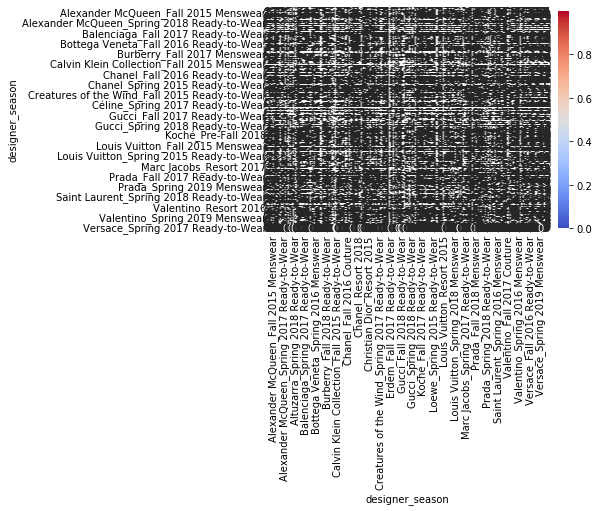

In [65]:

#sns.heatmap(distance_df, annot=True, cmap='coolwarm')

In [67]:
distance_df.to_csv('distance_df.csv')

# Cosine Simalarity by Designer

In [372]:
df=pd.concat([data,tfidf_df],axis=1)
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]
df['year']=df.year.astype(str)

In [126]:
sparse_pivot = sparse.csr_matrix(df.groupby('designer').mean().fillna(0))
distances = pairwise_distances(sparse_pivot, metric='cosine')
distance_df = pd.DataFrame(distances, index=df.groupby('designer').mean().T.columns , columns=df.groupby('designer').mean().T.columns )

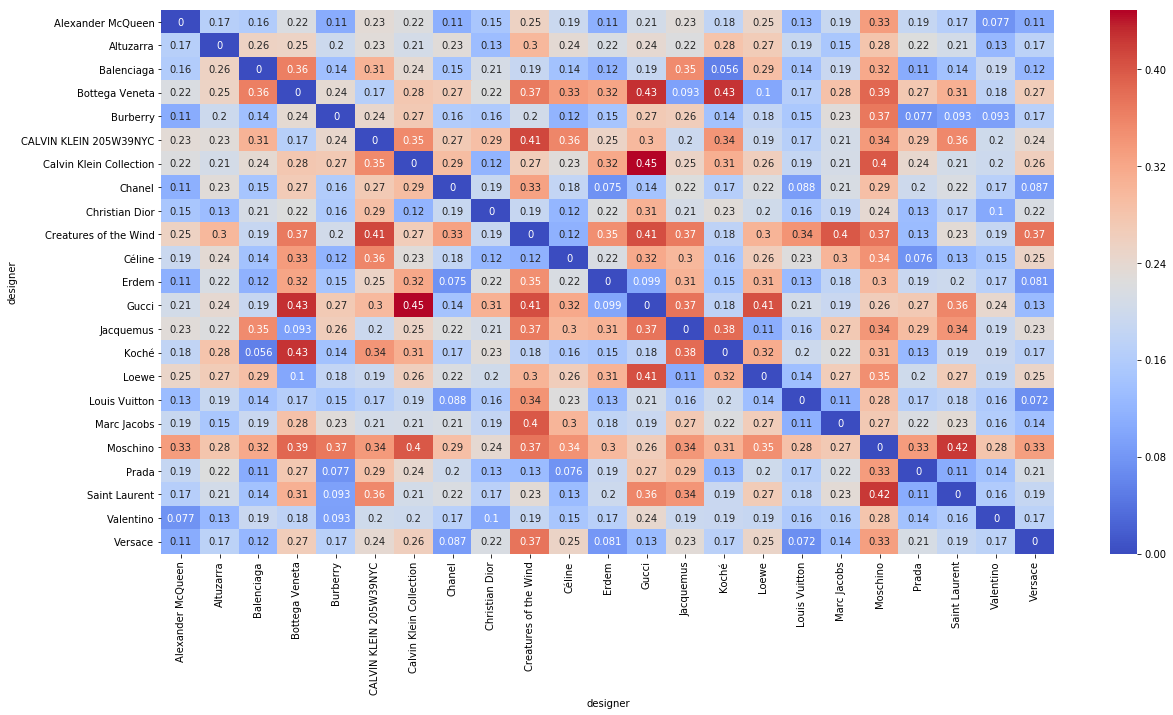

In [127]:
plt.figure(figsize=(20,10))
sns.heatmap(distance_df, annot=True, cmap='coolwarm')

In [128]:
distance_df.sum().sort_values()

designer
Valentino                  3.728899
Louis Vuitton              3.748344
Alexander McQueen          3.985388
Burberry                   4.026391
Christian Dior             4.156597
Prada                      4.200503
Versace                    4.244861
Chanel                     4.271702
Balenciaga                 4.367087
Erdem                      4.452934
Céline                     4.759836
Altuzarra                  4.783853
Marc Jacobs                4.832085
Saint Laurent              4.869462
Koché                      4.894382
Loewe                      5.325808
Jacquemus                  5.716357
Calvin Klein Collection    5.769978
CALVIN KLEIN 205W39NYC     5.935335
Bottega Veneta             5.950374
Gucci                      5.969714
Creatures of the Wind      6.269969
Moschino                   7.145090
dtype: float64

# Color Pallate by Show

In [200]:
df=pd.concat([data,tfidf_df],axis=1)
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]
df['year']=df.year.astype(str)

In [201]:
ck=df[df.designer_season=='Calvin Klein Collection_Spring 2015 Ready-to-Wear'].groupby('designer_season').max().T
ck.drop(['look','designer','season','color','month','year'],inplace=True)
ck['Calvin Klein Collection_Spring 2015 Ready-to-Wear'].sort_values(ascending=False).head(20)

dark purple        2.0489
navy blue         1.21554
royal purple      1.01915
brick            0.946495
deep blue        0.927254
dark brown       0.779177
black            0.771013
dark blue        0.765542
navy             0.645648
midnight blue    0.578922
brick red        0.565456
indigo           0.550856
eggplant         0.485102
burnt sienna     0.403716
dark red         0.367179
slate blue       0.292219
grey blue         0.23865
maroon           0.235445
dusty rose       0.229225
white            0.214907
Name: Calvin Klein Collection_Spring 2015 Ready-to-Wear, dtype: object

In [203]:
ck=df[df.designer_season=='Gucci_Spring 2018 Ready-to-Wear'].groupby('designer_season').max().T
ck.drop(['look','designer','season','color','month','year'],inplace=True)
ck['Gucci_Spring 2018 Ready-to-Wear'].sort_values(ascending=False).head(20)

indigo            1.91208
cream             1.71803
azure             1.39548
violet            1.32628
blue purple       1.30719
light teal        1.01564
royal purple     0.959797
sage             0.927621
hot pink         0.915177
dark blue        0.811133
purple           0.797264
medium blue      0.784386
cerulean         0.780064
dark teal        0.761218
bluish purple    0.760608
pale green       0.716981
blue green       0.714398
pale blue        0.692885
pale yellow      0.679986
deep blue        0.578557
Name: Gucci_Spring 2018 Ready-to-Wear, dtype: object

## Cosine Similarity by Image

In [375]:
df=pd.concat([data,tfidf_df],axis=1)
designers_to_exclude = ['Aalto',
                       'Alberta Ferretti',
                       'Camilla and Marc',
                       'Iceberg',
                       'Max Mara',
                       'Rachel Comey']
designers_to_include = set(df.designer)-set(designers_to_exclude)
df=df[df.designer.isin(designers_to_include)]
df['year']=df.year.astype(str)

In [376]:
df['designer_season_look']=df['designer_season']+df['look']


In [377]:
sparse_pivot = sparse.csr_matrix(df.groupby('designer_season_look').mean().fillna(0))
distances = pairwise_distances(sparse_pivot, metric='cosine')
distance_df = pd.DataFrame(distances, index=df.groupby('designer_season_look').mean().T.columns , columns=df.groupby('designer_season_look').mean().T.columns )

In [378]:
distance_df.sum().sort_values()

designer_season_look
Chanel_Fall 2015 Ready-to-WearLook 66                      9573.665985
Burberry_Fall 2016 Ready-to-WearLook 102                   9641.598645
Burberry_Spring 2016 MenswearLook 53                       9677.370728
Chanel_Spring 2016 Ready-to-WearLook 100                   9681.902403
Chanel_Resort 2015Look 32                                  9688.340615
Chanel_Fall 2016 Ready-to-WearLook 58                      9690.330665
Chanel_Resort 2015Look 3                                   9696.860019
Saint Laurent_Pre-Fall 2016Look 25                         9697.511810
Saint Laurent_Fall 2016 MenswearLook 25                    9697.511810
Balenciaga_Fall 2018 Ready-to-WearLook 56                  9703.148316
Creatures of the Wind_Spring 2016 Ready-to-WearLook 10     9708.993378
Saint Laurent_Fall 2015 Ready-to-WearLook 9                9722.352934
Versace_Spring 2018 Ready-to-WearLook 9                    9725.774831
Chanel_Fall 2015 Ready-to-WearLook 11                   